In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
# pip install chardet

In [4]:
# import chardet

# Read the file in binary mode to detect encoding
# with open('attacks.csv', 'rb') as f:
#     raw_data = f.read()
#     result = chardet.detect(raw_data)
#     encoding = result['encoding']
#     print(f"Detected encoding: {encoding}")

In [5]:
# Let's open the file
with open('attacks.csv', 'r', encoding='windows-1252') as f:
    df = pd.read_csv(f)

In [6]:
df # let's take a general look at the df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Hypothesis:
# Which are the most common activities? And the most dangerous?
# Is there any relation between the type and the fatality?
# Are all species equally fatal? If not, which is the most dangerous species?
# Fatality per oceans, in the US for instance
# (Florida is the most interesting state since it's the one where there have been more attacks),
# and/or fatality per counties in the most attacked countries.

In [8]:
# Configuration that's gonna be useful later when we want to show graphs in Seaborn
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [9]:
# it looks like the last 2 columns have no meaning, they don't even have a name and all but 3 cells are NaN
df['Unnamed: 22'].isna().value_counts()

Unnamed: 22
True     25722
False        1
Name: count, dtype: int64

In [10]:
df['Unnamed: 23'].isna().value_counts()

Unnamed: 23
True     25721
False        2
Name: count, dtype: int64

In [11]:
# let's just get rid of them
dfraw = df.drop(columns=['Unnamed: 22', 'Unnamed: 23'])
dfraw.shape # we check we have 2 columns less

(25723, 22)

In [12]:
dfraw.isna().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
dtype: int64

In [13]:
# we still have a lot of Nan values
dfraw[dfraw['Case Number'].isna() | (dfraw['Case Number']== '0')]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
5488,NaN,Reported 06-Sep-1905,1905.0,Provoked,USA,Florida,"Fort Pierce, St Lucie County",Fishing,David Curry,M,...,N,NaN,NaN,"Muncie Evening Press, 8/6/1913",1905.09.06.R-Curry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.09.06.R,1905.09.06.R,815.0
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6304.0
6303,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6305.0
6304,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0
6305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
dfraw[dfraw['Case Number.1'].isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6304.0
6303,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6305.0
6304,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0
6305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# we can see that every row in the column 'Case Number' is null except one row.
# we can also see that 'Case Number' is actually the date, which we also have in the columns 'Case Number.1' and 'Case Number.2'
# there are many rows where 'Case Number' is not null, but has a value of '0', and in these same rows all the other columns are null
# so we can just delete all the rows where 'Case Number.1' has null values

In [16]:
# We should have these rows:
25723-19421

6302

In [17]:
dfraw.dropna(subset=['Case Number.1'], inplace=True)
dfraw.shape # we check we have 19.421 rows less

(6302, 22)

In [18]:
dfraw.isna().sum() # to check if we can delete some more rows with nulls

Case Number                  1
Date                         0
Year                         2
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order               0
dtype: int64

In [19]:
# let's take a look at the nulls in 'Year'
dfraw[dfraw['Year'].isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
187,2017.01.08.R,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,...,NaN,NaN,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0
6079,1836.08.19.R,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,...,Y,NaN,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0


In [20]:
# let's change these values
dfraw.at[187,'Year'] = 2017
dfraw.at[6079,'Year'] = 1836

In [21]:
dfraw.iloc[187,:] # we check if it has been changed correctly

Case Number                                                    2017.01.08.R
Date                                                   Reported 08-Jan-2017
Year                                                                 2017.0
Type                                                                Invalid
Country                                                           AUSTRALIA
Area                                                             Queensland
Location                                                                NaN
Activity                                                       Spearfishing
Name                                                           Kerry Daniel
Sex                                                                       M
Age                                                                      35
Injury                               No attack, shark made a threat display
Fatal (Y/N)                                                             NaN
Time        

In [22]:
dfraw.iloc[6079,:] # we check if it has been changed correctly

Case Number                                                    1836.08.19.R
Date                                                   Reported 19-Aug-1836
Year                                                                 1836.0
Type                                                             Unprovoked
Country                                                             ENGLAND
Area                                                             Cumberland
Location                                                         Whitehaven
Activity                                                           Swimming
Name                                                                  a boy
Sex                                                                       M
Age                                                                     NaN
Injury                                                                FATAL
Fatal (Y/N)                                                               Y
Time        

In [23]:
dfraw['Year'].isna().sum() # we check if it has been changed correctly

0

In [24]:
dfraw.isna().sum() # let's check if we can delete some more rows with these null values

Case Number                  1
Date                         0
Year                         0
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order               0
dtype: int64

In [25]:
dfraw.Type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [26]:
dfraw[dfraw['Type'].isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
85,2017.09.15.a,15-Sep-2017,2017.0,NaN,SAMOA,Upolu Island,Nofoali’i,Fishing,male,M,...,N,Night,NaN,"Samoa Observer, 9/16/2017",2017.09.15.a-Samoa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.15.a,2017.09.15.a,6218.0
382,2015.07.27,27-Jul-2015,2015.0,NaN,AUSTRALIA,Victoria,Tyrendarra Beach,Surfing,male,M,...,NaN,NaN,NaN,NaN,2015.07.27-Victoria.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.27,2015.07.27,5921.0
4867,1936.09.11.R,Reported 11-Sep-1936,1936.0,NaN,VIETNAM,NaN,Saigon,Wreck of a sampam,8 crew,M,...,Y,NaN,NaN,"Lansing State Journal, 9/11/1936",1936.09.11-Saigon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1936.09.11.R,1936.09.11.R,1436.0
5705,1890.03.03.R,Reported 03-Mar-1890,1890.0,NaN,CEYLON,NaN,NaN,Diving,a pearl diver,M,...,Y,NaN,NaN,"The Guardian, 3/3/1890",1890.03.03.R-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1890.03.03.R,1890.03.03.R,598.0


In [27]:
# we cannot delete these rows

In [28]:
dfraw[dfraw['href formula'].isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
3244,1975.01.19,19-Jan-1975,1975.0,Unprovoked,AUSTRALIA,South Australia,Coffin Bay,Surfing,David Barrowman,M,...,Y,NaN,NaN,"J. West; Adelaide Advertiser, 1/20/1975; P. Ke...",1975.01.19-Barrowman.pdf,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,1975.01.19,1975.01.19,3059.0


In [29]:
# let's keep this row as well

In [30]:
dfraw[dfraw['Country'].isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
62,2017.11.13.R,Reported 13-Nov-2017,2017.0,Unprovoked,NaN,NaN,NaN,Surfing,Timur Yunusov,M,...,N,NaN,NaN,Instagram,2017.11.13.R-Timur.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.13.R,2017.11.13.R,6241.0
525,2014.08.00,Aug-2014,2014.0,Invalid,NaN,NaN,NaN,Sea disaster,Cuban refugees,M,...,NaN,NaN,Shark involvement not confirmed,"Associated Press, 11/27/2014",2014.08.00-Cuban-refugees.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.08.00,2014.08.00,5778.0
2956,1983.00.00.d,Ca. 1983,1983.0,Unprovoked,NaN,English Channel,NaN,Swimming,Padma Shri Taranath Narayan Shenoy,M,...,N,NaN,NaN,"Times of India, 2/5/2012",1983.00.00.d-Shenoy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1983.00.00.d,1983.00.00.d,3347.0
3378,1970.11.00,Nov-1970,1970.0,Unprovoked,NaN,NaN,NaN,NaN,Heinz Plotsky,M,...,N,NaN,NaN,"H.D. Baldridge (1994), SAF Case #1645",1970.11.00-NV-Plotsky.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.11.00,1970.11.00,2925.0
3387,1970.08.02,02-Aug-1970,1970.0,Invalid,NaN,Caribbean Sea,Between St. Kitts & Nevis,Sea Disaster Sinking of ferryboat Christina,NaN,NaN,...,NaN,Afternoon,Shark involvement prior to death was not confi...,"Rome News Tribune, 8/3/1970",1970.08.02-Christina-ferryboat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.08.02,1970.08.02,2916.0
3388,1970.07.05,5-Jul-1970,1970.0,Unprovoked,NaN,NaN,NaN,NaN,male,M,...,N,Night,Mako shark,"H.D. Baldridge (1994), SAF Case #1628",1970.07.05-NV-male.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.07.05,1970.07.05,2915.0
3395,1970.04.00.b,Apr-1970,1970.0,Provoked,NaN,NaN,NaN,Freediving,Lionel Jarvis,M,...,N,NaN,Wobbegong shark,"H.D. Baldridge (1994), SAF Case #1616",1970.04.00.b-NV-Jarvis.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.04.00.b,1970.04.00.b,2908.0
3399,1970.02.05,5-Feb-1970,1970.0,Unprovoked,NaN,NaN,NaN,Wading,Sally Anne Irvine,F,...,N,NaN,Carpet shark,H.D. Baldridge (1994) SAF Case #1626,1970.02.05-NV-Irvine.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.02.05,1970.02.05,2904.0
3425,1969.08.00,Aug-1969,1969.0,Unprovoked,NaN,NaN,NaN,NaN,Rodney Hughes,M,...,N,NaN,NaN,H.D. Baldridge (1994) SAF Case #1602,1969.08.00-NV-Hughes.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1969.08.00,1969.08.00,2878.0
3605,1965.10.21,21-Oct-1965,1965.0,Unprovoked,NaN,NaN,Florida Strait,The boat Caribou II sank,Mario Castellanos,M,...,N,NaN,NaN,"Lodi News Sentinel, 10/30/1965",1965.10.21-Castellanos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1965.10.21,1965.10.21,2698.0


In [31]:
# since we cannot determine these 50 countries, let's change the value so we don't have nulls

In [32]:
dfraw['Country'] = np.where(dfraw.Country.isna(), 'Unknown', dfraw.Country)

In [33]:
# we check if it has been changed correctly
dfraw[dfraw['Country'].isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order


In [34]:
# correct, now there are no nulls in the column 'Country'
# now let's examine the columns and see if we can delete some more
print(dfraw.shape)
dfraw.head()

(6302, 22)


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [35]:
# There are two columns that look the same, let's check if they are actually the same
(dfraw['Case Number.1'] == dfraw['Case Number.2']).value_counts()

True     6282
False      20
Name: count, dtype: int64

In [36]:
# well no, there are 20 rows where the values are different
# let's create a subset
dfraw[(dfraw['Case Number.1'] != dfraw['Case Number.2'])]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
34,2018.04.03,03-Apr-2018,2018.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,St. Francis Bay,Surfing,Ross Spowart,M,...,N,15h00,White shark,"K. McMurray, TrackingSharks.com",2018.04.03-StFrancisBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.02,2018.04.03,6269.0
117,2017.07.20.a,20-Jul-2017,2017.0,Unprovoked,USA,California,"Seal Rock, Goleta Beach, Santa Barbara",SUP,Rolf Geyling,M,...,N,07h45,"White shark, 8' to 10'","R. Collier, GSAF",2017.07.20.a-Geyling.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017/07.20.a,2017.07.20.a,6186.0
144,2017.05.06,05-May-2017,2017.0,Unprovoked,MEXICO,Baja California Sur,"Los Arbolitos, Cabo Pulmo",Snorkeling,Andres Rozada,M,...,Y,17h00,NaN,J. Rozada,2017.05.06-Rozada.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.06,2017.05.06,6159.0
217,2016.09.15,16-Sep-2016,2016.0,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,6086.0
314,2016.01.24.b,24-Jan-2016,2016.0,Unprovoked,USA,Texas,Off Surfside,Spearfishing,Keith Love,M,...,N,09h30 / 10h00,Bull sharks x 2,K. Love,2016.01.24.b-Love.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.01.24.b,2016.01.24.b,5989.0
334,2015.12.23,07-Nov-2015,2015.0,Invalid,USA,Florida,"Paradise Beach, Melbourne, Brevard County",Surfing,Ryla Underwood,F,...,NaN,11h00,Shark involvement not confirmed,"Fox25Orlando, 11/7/2015",2015.11.07-Underwood.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.11.07,2015.12.23,5969.0
339,2015.10.28.a,28-Oct-2015,2015.0,Unprovoked,USA,Hawaii,"Malaka, Oahu",Body boarding,Raymond Senensi,M,...,N,14h50,NaN,"Star Advertiser, 10/28/2015",2015.10.28-Senensi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.10.28,2015.10.28.a,5964.0
560,2014.05.04,04-May-2014,2014.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Simonstown,Diving,NaN,NaN,...,N,NaN,Cow shark,"Sunday Times, 5/5/2014",2015.05.04-CowShark.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.05.04,2014.05.04,5743.0
3522,1967.07.05,05-Jul-1967,1967.0,Unprovoked,TURKEY,Mugla Province,Kucukada Island,Spearfishing,Gungor Guven,M,...,Y,13h40,NaN,"C. Moore, GSAF",1967.07.05-Guven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1967/07.05,1967.07.05,2781.0
3795,"1962,08.30.b",30-Aug-1962,1962.0,Boat,TURKEY,Antalya Province,Ucagiz,NaN,Occupant: Hasan Olta,M,...,N,NaN,NaN,"C.Moore, GSAF",1962.08.30.b-pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1962.08.30.b,"1962,08.30.b",2508.0


In [37]:
# it's a bit strange, it looks like both columns are dates but sometimes it doesn't coincide with the 'Date' column
# let's isolate these columns to see it better
columnscasenumber = ['Date','Case Number','Case Number.1','Case Number.2']
dfraw[columnscasenumber]

,Date,Case Number,Case Number.1,Case Number.2
0,25-Jun-2018,2018.06.25,2018.06.25,2018.06.25
1,18-Jun-2018,2018.06.18,2018.06.18,2018.06.18
2,09-Jun-2018,2018.06.09,2018.06.09,2018.06.09
3,08-Jun-2018,2018.06.08,2018.06.08,2018.06.08
4,04-Jun-2018,2018.06.04,2018.06.04,2018.06.04
...,...,...,...,...
6297,Before 1903,ND.0005,ND.0005,ND.0005
6298,Before 1903,ND.0004,ND.0004,ND.0004
6299,1900-1905,ND.0003,ND.0003,ND.0003
6300,1883-1889,ND.0002,ND.0002,ND.0002


In [38]:
# we will just keep one of these columns, 'Date' and 'Case Number' show almost the same info.
# we will keep 'Case Number' because of the format, but also keep 'Date' for the moment, because it gives us info of the year that 'Case Number' doesn't
dfraw.drop(columns=['Case Number.1','Case Number.2'], inplace=True)
dfraw.shape

(6302, 20)

In [39]:
# the 'href' and 'href formula' columns display a pdf, let's try to open it
dfraw.loc[0,'href']

'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf'

In [40]:
# since we cannot open it, we will just erase these columns as well
dfraw.drop(columns=['href','href formula'], inplace=True)
dfraw.shape

(6302, 18)

In [41]:
# let's erase also the 'pdf' column, since it's also a pdf we cannot open
dfraw.drop(columns='pdf', inplace=True)
dfraw.shape

(6302, 17)

In [42]:
# it looks like 'original order' is an index
dfraw['original order'].value_counts()

original order
569.0     2
6303.0    1
2106.0    1
2097.0    1
2098.0    1
         ..
4205.0    1
4206.0    1
4207.0    1
4208.0    1
2.0       1
Name: count, Length: 6301, dtype: int64

In [43]:
# only one value is repeted, we can erase the column
dfraw.drop(columns='original order', inplace=True)

In [44]:
# convert the type of the 'Year' column
dfraw.Year.dtype

dtype('float64')

In [45]:
dfraw.Year = dfraw.Year.astype(int)
dfraw

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938"


In [46]:
# there are a lot of Year = 0, let's take a closer look
dfraw[dfraw['Year'] == 0]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
6177,0000.0214,Ca. 214 B.C.,0,Unprovoked,Unknown,Ionian Sea,NaN,Ascending from a dive,"Tharsys, a sponge diver",M,NaN,"FATAL, shark/s bit him in two",Y,NaN,NaN,"Reported by Greek poet, Leonidas of Tarentum (..."
6178,0000.0336,Ca. 336.B.C..,0,Unprovoked,GREECE,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious...,A candidate for initiation,M,NaN,"FATAL, shark ""bit off all lower parts of him u...",Y,NaN,NaN,Plutarch (45 - 125 A.D.) in Life of Phoecion (...
6179,0000.0493,493 B.C.,0,Sea Disaster,GREECE,Off Thessaly,NaN,Shipwrecked Persian Fleet,males,M,NaN,Herodotus tells of sharks attacking men in the...,Y,NaN,NaN,Herodotus (485 - 425 B.C.)
6180,0000.0725,Ca. 725 B.C.,0,Sea Disaster,ITALY,Tyrrhenian Sea,Krater found during excavations at Lacco Ameno...,Shipwreck,males,M,NaN,Depicts shipwrecked sailors attacked by a sha...,Y,NaN,NaN,"V.M. Coppleson (1958), p.262, et al"
6181,ND-0154,Before 1939,0,Unprovoked,CANADA,NaN,Grand Banks,Fishing,Joe Folsom,M,NaN,Arm bitten,N,NaN,NaN,"C.E.Russell, pp. 310-311"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938"


<Axes: xlabel='Year', ylabel='Count'>

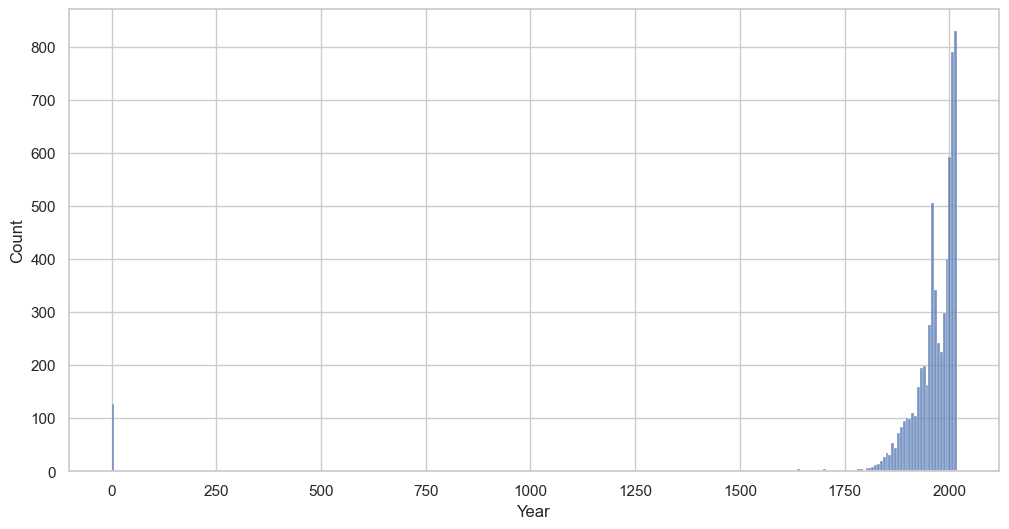

In [47]:
# looks like these 'ND.00XX' in 'Case Number' could mean 'No Data', since we don't have information of the year
# plus, we can see some info of the aproximate year in 'Investigator or Source'
# there are some rows where we have information of the year in 'Date', let's keep them for now

import seaborn as sns
import matplotlib.pyplot as plt

# let's take a look at it visually
sns.histplot(data=dfraw, x='Year')

In [48]:
dfraw.shape

(6302, 16)

In [49]:
# we can see that most of the data is from 1800, let's take a closer look
dfyears = dfraw[dfraw['Year']>1800]
dfyears.shape

(6132, 16)

<Axes: xlabel='Year', ylabel='Count'>

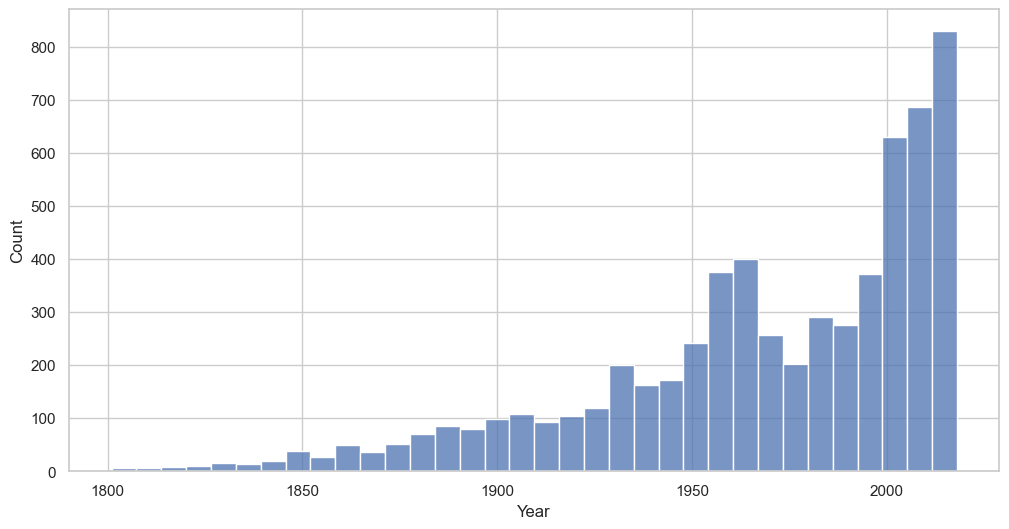

In [50]:
# let's take a newer look at it visually 
sns.histplot(data=dfyears, x='Year')

In [51]:
# we still have quite a long tail

In [52]:
# let's compare the summary statistics of different time periods to see better which years to keep

stats1800 = dfyears.describe().round(2)
stats1850 = dfyears[dfyears['Year']>1850].describe().round(2)
stats1900 = dfyears[dfyears['Year']>1900].describe().round(2)
stats1950 = dfyears[dfyears['Year']>1950].describe().round(2)

combined = pd.concat([stats1800, stats1850, stats1900, stats1950], axis=1, keys=['1800','1850','1900','1950'])
combined

,1800,1850,1900,1950
,Year,Year,Year,Year
count,6132.00,6027.00,5550.00,4455.00
mean,1968.82,1971.18,1978.95,1991.11
std,43.77,40.24,31.31,20.56
min,1801.00,1851.00,1901.00,1951.00
25%,1946.00,1949.00,1958.00,1972.00
50%,1980.00,1981.00,1987.00,1997.00
75%,2005.00,2006.00,2007.00,2009.00
max,2018.00,2018.00,2018.00,2018.00


(6027, 16)

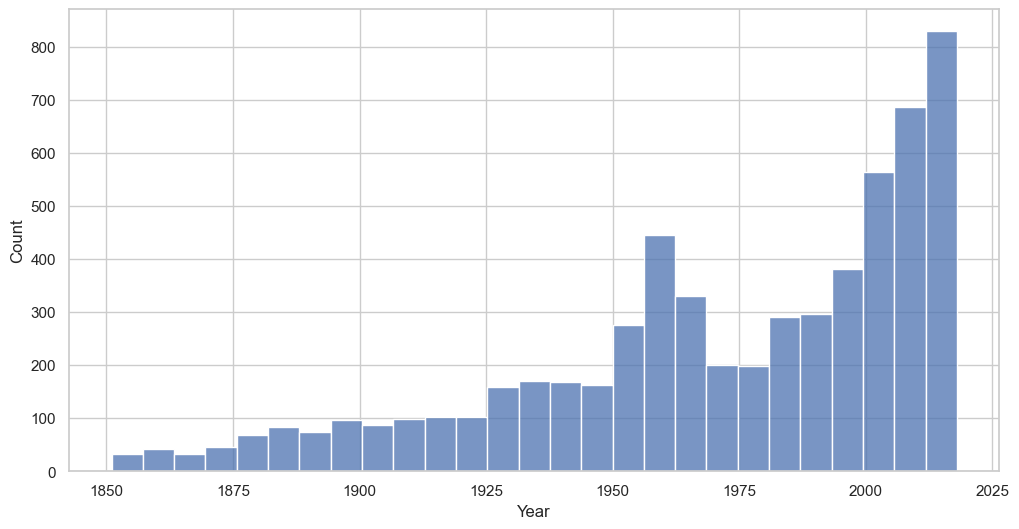

In [53]:
# we see that the mean increases significantly from 1850
# this is because the mean is strongly affected by extreme numbers (all the Year=0 values we had in the beggining, for instance)
# we can also observe a similar change in the median, in 1850 the median is 1981, but in 1900 it's 1987, quite a big change
# so we will just keep the values from 1850
dfyears = dfyears[dfyears['Year']>1850]
sns.histplot(data=dfyears, x='Year')
dfyears.shape

In [54]:
# let's take a new look where Year = 0, see if the can change some
dfraw[dfraw['Year'] == 0]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
6177,0000.0214,Ca. 214 B.C.,0,Unprovoked,Unknown,Ionian Sea,NaN,Ascending from a dive,"Tharsys, a sponge diver",M,NaN,"FATAL, shark/s bit him in two",Y,NaN,NaN,"Reported by Greek poet, Leonidas of Tarentum (..."
6178,0000.0336,Ca. 336.B.C..,0,Unprovoked,GREECE,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious...,A candidate for initiation,M,NaN,"FATAL, shark ""bit off all lower parts of him u...",Y,NaN,NaN,Plutarch (45 - 125 A.D.) in Life of Phoecion (...
6179,0000.0493,493 B.C.,0,Sea Disaster,GREECE,Off Thessaly,NaN,Shipwrecked Persian Fleet,males,M,NaN,Herodotus tells of sharks attacking men in the...,Y,NaN,NaN,Herodotus (485 - 425 B.C.)
6180,0000.0725,Ca. 725 B.C.,0,Sea Disaster,ITALY,Tyrrhenian Sea,Krater found during excavations at Lacco Ameno...,Shipwreck,males,M,NaN,Depicts shipwrecked sailors attacked by a sha...,Y,NaN,NaN,"V.M. Coppleson (1958), p.262, et al"
6181,ND-0154,Before 1939,0,Unprovoked,CANADA,NaN,Grand Banks,Fishing,Joe Folsom,M,NaN,Arm bitten,N,NaN,NaN,"C.E.Russell, pp. 310-311"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938"


In [55]:
dfraw[dfraw['Year'] == 0].tail(10) # we run this cell as we change the Year values in dfraw

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
6292,ND.0010,Circa 1862,0,Unprovoked,USA,Hawaii,Puna,NaN,"A ""chiefess""",F,NaN,Ankle bitten,N,NaN,NaN,Captain W. Young
6293,ND.0009,Before 1906,0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,boy,M,NaN,"FATAL, knocked overboard by tail of shark & ca...",Y,NaN,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui..."
6294,ND.0008,Before 1906,0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,NaN,FATAL,Y,NaN,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui..."
6295,ND.0007,Before 1906,0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,NaN,FATAL,Y,NaN,Blue pointers,"NY Sun, 9/9/1906, referring to account by Loui..."
6296,ND.0006,Before 1906,0,Unprovoked,AUSTRALIA,New South Wales,,Swimming,Arab boy,M,NaN,FATAL,Y,NaN,Said to involve a grey nurse shark that leapt ...,"L. Becke in New York Sun, 9/9/1906; L. Schultz..."
6297,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938"
6301,ND.0001,1845-1853,0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker


In [56]:
# we will of course only change the rows where Year > 1850, the subset we want to keep
# of course this method is approximate

dfraw.at[6300, 'Year'] = 1886
dfraw.at[6299, 'Year'] = 1902
dfraw.at[6298, 'Year'] = 1902
dfraw.at[6297, 'Year'] = 1902
dfraw.at[6296, 'Year'] = 1905
dfraw.at[6295, 'Year'] = 1905
dfraw.at[6294, 'Year'] = 1905
dfraw.at[6293, 'Year'] = 1905
dfraw.at[6292, 'Year'] = 1862
dfraw.at[6291, 'Year'] = 1910
dfraw.at[6290, 'Year'] = 1912
dfraw.at[6289, 'Year'] = 1912
dfraw.at[6288, 'Year'] = 1915
dfraw.at[6287, 'Year'] = 1916
dfraw.at[6286, 'Year'] = 1920
dfraw.at[6285, 'Year'] = 1920
dfraw.at[6284, 'Year'] = 1910
dfraw.at[6283, 'Year'] = 1920
dfraw.at[6282, 'Year'] = 1921
dfraw.at[6280, 'Year'] = 1939
dfraw.at[6278, 'Year'] = 1929
dfraw.at[6277, 'Year'] = 1926
dfraw.at[6276, 'Year'] = 1932
dfraw.at[6274, 'Year'] = 1934
dfraw.at[6273, 'Year'] = 1904
dfraw.at[6272, 'Year'] = 1940
dfraw.at[6271, 'Year'] = 1941
dfraw.at[6270, 'Year'] = 1904
dfraw.at[6269, 'Year'] = 1943
dfraw.at[6268, 'Year'] = 1944
dfraw.at[6267, 'Year'] = 1945
dfraw.at[6266, 'Year'] = 1946
dfraw.at[6265, 'Year'] = 1942
dfraw.at[6264, 'Year'] = 1943
dfraw.at[6263, 'Year'] = 1943
dfraw.at[6262, 'Year'] = 1945
dfraw.at[6261, 'Year'] = 1938
dfraw.at[6260, 'Year'] = 1944
dfraw.at[6259, 'Year'] = 1943
dfraw.at[6258, 'Year'] = 1951
dfraw.at[6257, 'Year'] = 1954
dfraw.at[6256, 'Year'] = 1955
dfraw.at[6255, 'Year'] = 1955
dfraw.at[6254, 'Year'] = 1956
dfraw.at[6253, 'Year'] = 1956

# let's group some cases with loc, 'at' doesn't work well with conditions
# I run the next cell (dfraw[dfraw['Year'] == 0]['Date'].unique()) to see the unique values in 'Date'
# and I keep updating and running this cell to apply the changes
dfraw.loc[dfraw['Date']=='Before 1958', 'Year'] = 1957
dfraw.loc[dfraw['Date']=='Before  1958', 'Year'] = 1957
dfraw.loc[dfraw['Date']=='Before  24 Apr-1959', 'Year'] = 1958
dfraw.loc[dfraw['Date']=='Before  19-Jun-1959', 'Year'] = 1958
dfraw.loc[dfraw['Date']=='Before 1961', 'Year'] = 1960
dfraw.loc[dfraw['Date']=='Before 1960', 'Year'] = 1959
dfraw.loc[dfraw['Date']=='1960s', 'Year'] = 1965
dfraw.loc[dfraw['Date']=='No date, After August 1926 and before 1936', 'Year'] = 1931
dfraw.loc[dfraw['Date']=='No date, Before 1902', 'Year'] = 1901
dfraw.loc[dfraw['Date']=='No date, Before 8-May-1965', 'Year'] = 1964
dfraw.loc[dfraw['Date']=='No date, Before 3-Jan-1967', 'Year'] = 1966
dfraw.loc[dfraw['Date']=='No date, Before 1969', 'Year'] = 1968
dfraw.loc[dfraw['Date']=='No date, Before 1975', 'Year'] = 1974
dfraw.loc[dfraw['Date']=='No date, Before  1975', 'Year'] = 1974
dfraw.loc[dfraw['Date']=='No date, Before 1987', 'Year'] = 1986
dfraw.loc[dfraw['Date']=='No date, Before Aug-1987', 'Year'] = 1986
dfraw.loc[dfraw['Date']=='No date, Before Aug-1989', 'Year'] = 1988
dfraw.loc[dfraw['Date']=='Before 1996', 'Year'] = 1995
dfraw.loc[dfraw['Date']=='No date, Before Mar-1995', 'Year'] = 1994
dfraw.loc[dfraw['Date']=='No date, Before May-1996', 'Year'] = 1995
dfraw.loc[dfraw['Date']=='Before Feb-1998', 'Year'] = 1997
dfraw.loc[dfraw['Date']=='2003?', 'Year'] = 2003
dfraw.loc[dfraw['Date']=='No date, Before 1963', 'Year'] = 1962
dfraw.loc[dfraw['Date']=='1950s', 'Year'] = 1955
dfraw.loc[dfraw['Date']=='Before 1962', 'Year'] = 1961
dfraw.loc[dfraw['Date']=='Before 2004', 'Year'] = 2003
dfraw.loc[dfraw['Date']=='Before 2003', 'Year'] = 2002
dfraw.loc[dfraw['Date']=='Before 2006', 'Year'] = 2005
dfraw.loc[dfraw['Date']=='No date, late 1960s', 'Year'] = 1968
dfraw.loc[dfraw['Date']=='Before 1901', 'Year'] = 1900
dfraw.loc[dfraw['Date']=='Before 1911', 'Year'] = 1910
dfraw.loc[dfraw['Date']=='Before 08-Jun-1912', 'Year'] = 1911
dfraw.loc[dfraw['Date']=='Before 1936', 'Year'] = 1935
dfraw.loc[dfraw['Date']=='1896-1913', 'Year'] = 1905
dfraw.loc[dfraw['Date']=='Before 1963', 'Year'] = 1962
dfraw.loc[dfraw['Date']=='Before 2012', 'Year'] = 2011
dfraw.loc[dfraw['Date']=='Before 1934', 'Year'] = 1933
dfraw.loc[dfraw['Date']=='Before 2011', 'Year'] = 2010
dfraw.loc[dfraw['Date']=='Before 1909', 'Year'] = 1908
dfraw.loc[dfraw['Date']=='Beforer 1994', 'Year'] = 1993
dfraw.loc[dfraw['Date']=='Before 2009', 'Year'] = 2008
dfraw.loc[dfraw['Date']=='Before 1876', 'Year'] = 1875
dfraw.loc[dfraw['Date']=='Before 1900', 'Year'] = 1899
dfraw.loc[dfraw['Date']=='Before 1908', 'Year'] = 1907
dfraw.loc[dfraw['Date']=='Between   1951-1963', 'Year'] = 1957
dfraw.loc[dfraw['Date']=='Before 1916', 'Year'] = 1915
dfraw.loc[dfraw['Date']=='1880-1899', 'Year'] = 1889
dfraw.loc[dfraw['Date']=='Before 1939', 'Year'] = 1938
dfraw.loc[dfraw['Date']=='1990 or 1991', 'Year'] = 1991
dfraw.loc[dfraw['Date']=='Before 2016', 'Year'] = 2015
dfraw.loc[dfraw['Date']=='Before Oct-2009', 'Year'] = 2008
dfraw.loc[dfraw['Date']=='2009?', 'Year'] = 2008
dfraw.loc[dfraw['Date']=='Before 1930', 'Year'] = 1929

dfraw[dfraw['Year'] == 0].shape

(10, 16)

In [57]:
dfraw[dfraw['Year'] == 0]['Date'].value_counts() # we run this cell as we change the Year values in dfraw

Date
No date          5
Ca. 214 B.C.     1
Ca. 336.B.C..    1
493 B.C.         1
Ca. 725 B.C.     1
1845-1853        1
Name: count, dtype: int64

In [58]:
# let's include these values we have changed in 'dfraw' in 'dfyears', the subset we want to analize, that includes the values where Year > 1850
dfyears = dfraw[dfraw['Year']>1850]
dfyears.shape

(6142, 16)

In [59]:
# before changing all these years, as we can see in a previous cell, we had 6027 rows, so we have included more than 100 rows

(6142, 16)

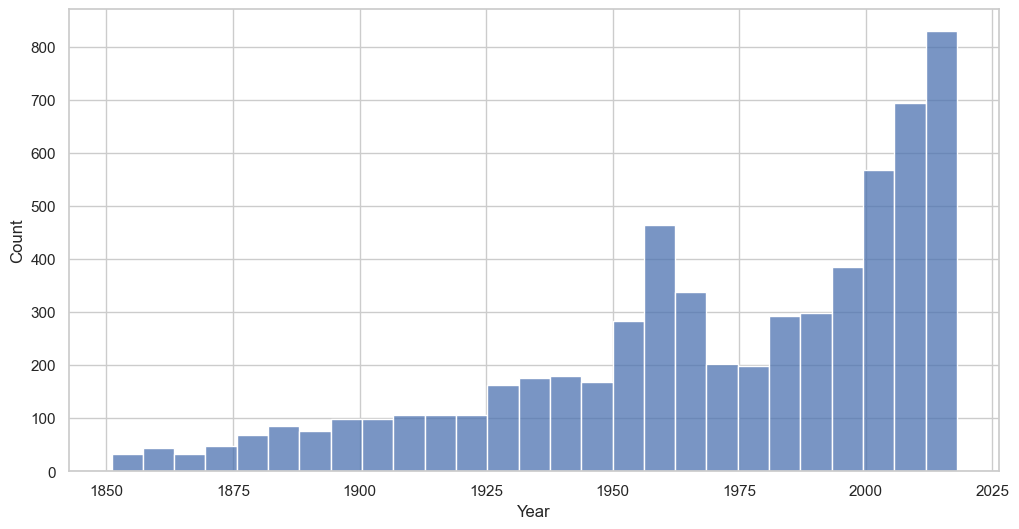

In [60]:
sns.histplot(data=dfyears, x='Year')
dfyears.shape

In [61]:
# now we can drop the column 'Date' and just keep 'Case Number', which is actually the date
dfyears.drop(columns = 'Date', inplace=True)
# we can change the name of 'Case Number' to make it clearer
dfyears.rename(columns={'Case Number':'Date'}, inplace=True)

In [62]:
# let's clean the names of the columns
dfyears.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ',
       'Investigator or Source'],
      dtype='object')

In [63]:
dfyears.rename(columns={'Sex ':'Sex'}, inplace=True)
dfyears.rename(columns={'Species ':'Species'}, inplace=True)

columns_lower = {i:i.lower() for i in dfyears.columns}
dfyears.rename(columns = columns_lower, inplace=True)
dfyears.sample()

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal (y/n),time,species,investigator or source
3220,1975.07.05,1975,Provoked,AUSTRALIA,Western Australia,"15 km north of Lancelin, north of Perth",Spearfishing,Dennis Thompson,M,29,Speared shark bit his arm between elbow and s...,N,NaN,2.4 m [8'] whaler shark,"Washington Post, 7/7/1975"


In [64]:
# let's make a copy of out dataframe with a more accurate name
dfclean = dfyears.copy()

In [65]:
dfclean.dtypes

date                      object
year                       int32
type                      object
country                   object
area                      object
location                  object
activity                  object
name                      object
sex                       object
age                       object
injury                    object
fatal (y/n)               object
time                      object
species                   object
investigator or source    object
dtype: object

In [66]:
# only the year is a numerical type, while Age should be as well
# if it's an object, we will not be able to get numerical statistics

In [67]:
dfclean['age'].unique() # let's take a look at the unique values

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35',
  

In [68]:
dfclean.shape # let's take a look at the number of rows

(6142, 15)

In [69]:
# first I create another column, a copy of 'age' so I can store these values just in case
dfclean['info_age'] = dfclean['age']
# I want to put them side by side
dfclean.columns

Index(['date', 'year', 'type', 'country', 'area', 'location', 'activity',
       'name', 'sex', 'age', 'injury', 'fatal (y/n)', 'time', 'species',
       'investigator or source', 'info_age'],
      dtype='object')

In [70]:
newcolumns = ['date', 'year', 'type', 'country', 'area', 'location', 'activity',
       'name', 'sex', 'age', 'info_age', 'injury', 'fatal (y/n)', 'time', 'species',
       'investigator or source'] # I change the order of the columns
dfclean = dfclean.reindex(columns=newcolumns)
dfclean.sample() # let's check if the order has been changed correctly

,date,year,type,country,area,location,activity,name,sex,age,info_age,injury,fatal (y/n),time,species,investigator or source
981,2010.10.02.b,2010,Unprovoked,BAHAMAS,Exuma Islands,NaN,Snorkeling,Jose Molla,M,NaN,NaN,Calf bitten,N,NaN,Lemon shark,Sharksurvivors.com


In [71]:
# I want to apply regex to select the rows where 'age' has an odd value, where there is not a digit
# I cannot do it because I have null values
# how many nulls are there in 'age'?
dfclean[dfclean.age.isna()].shape

(2684, 16)

In [72]:
# so let's erase the nulls
dfage = dfclean.dropna(subset=['age']) # I delete the rows where 'age' is null and store it in a new dataframe to not edit the cleaned one
dfage.shape # to see how many rows I have left

(3458, 16)

In [73]:
dfoddages = dfage[dfage['age'].str.contains(r"\D")] # I apply regex to select the rows where 'age' has an odd value, where there is not a digit
dfoddages

,date,year,type,country,area,location,activity,name,sex,age,info_age,injury,fatal (y/n),time,species,investigator or source
48,2018.01.21,2018,Unprovoked,NEW CALEDONIA,NaN,Nouville,Spearfishing,male,M,40s,40s,Injuries to abdomen and arm,N,15h30,"Bull shark, 3 m",TrackingSharks.com
150,2017.04.27,2017,Unprovoked,NEW ZEALAND,South Island,"Porpoise Bay, Catlins",Body boarding,female,F,20s,20s,Puncture wounds & laceration above knee,N,14h00,NaN,"C.Black, GSAF"
182,2017.01.22,2017,Unprovoked,USA,Florida,"Vero Beach, Indian River County",NaN,male,M,Teen,Teen,Puncture wounds to lower arm or hand,N,14h00,NaN,"TCPalm, 1/22/2017"
194,2016.12.11.b,2016,Unprovoked,FRENCH POLYNESIA,Tuamotos,Takapoto Atoll,Fishing,male,M,40s,40s,Hand injured?,N,NaN,NaN,"Tahiti Info, 12/12/2016"
219,2016.09.11,2016,Unprovoked,USA,Florida,"Ponte Vedra, St. Johns County",Wading,male,M,60s,60s,Minor injury to arm,N,15h15,3' to 4' shark,"News4Jax, 9/11/2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5312,1916.06.30,1916,Unprovoked,USA,New Jersey,"Atlantic City, Atlantic County",Swimming,boy,M,10 or 12,10 or 12,Heel bitten,N,NaN,NaN,C. Phinizy
5483,1906.01.28,1906,Unprovoked,AUSTRALIA,New South Wales,Georges River,Bathing,William Joseph Dobson.,M,31 or 33,31 or 33,FATAL,Y,14h10,NaN,"J. Green, p.31"
5544,1901.09.23.R,1901,Unprovoked,CYPRUS,Southern Cyprus,Larnaca,Swimming,male,M,Teen,Teen,"FATAL, bitten on arms, chest & legs",Y,NaN,2 m shark,"Bardanis citing Embros, 9/23/1901"
6002,1855.04.09.R,1855,Unprovoked,AUSTRALIA,South Australia,Port Wakefield,Fell overboard from the Malacca,child,F,2½,2½,FATAL,Y,NaN,NaN,"The Argus, 4/9/1855"


In [74]:
dfoddages.age.unique() # the odd values in 'age'

array(['40s', '20s', 'Teen', '60s', '18 months', '30s', '50s', 'teen',
       '28 & 26', '18 or 20', '12 or 13', '46 & 34', '28, 23 & 30',
       'Teens', '36 & 26', '8 or 10', '\xa0 ', ' ', '30 or 36', '6½',
       '21 & ?', '33 or 37', 'mid-30s', '23 & 20', ' 30',
       '7      &    31', ' 28', '20?', "60's", '32 & 30', '16 to 18',
       'Elderly', 'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ',
       '>50', '18 to 22', 'adult', '9 & 12', '? & 19', '9 months',
       '25 to 35', '23 & 26', '(adult)', '33 & 37', '25 or 28',
       '37, 67, 35, 27,  ? & 27', '21, 34,24 & 35', '30 & 32', '50 & 30',
       '17 & 35', 'X', '"middle-age"', '13 or 18', '34 & 19', '33 & 26',
       '2 to 3 months', 'MAKE LINE GREEN', ' 43', '"young"', '7 or 8',
       '17 & 16', 'F', 'Both 11', '9 or 10', 'young', '36 & 23', '  ',
       'A.M.', '?    &   14', '10 or 12', '31 or 33', '2½', '13 or 14'],
      dtype=object)

In [75]:
dfoddages.index # let's get the indexes of these 106 rows with these odd values

Index([  48,  150,  182,  194,  219,  294,  445,  468,  502,  509,
       ...
       5002, 5061, 5084, 5170, 5181, 5312, 5483, 5544, 6002, 6265],
      dtype='int64', length=106)

In [76]:
# we could analize every row and substitute them for a closer value, such as '1' where it says '9 months',
# but we will just substitute these odd values for the mean
dfclean.loc[dfoddages.index, 'age'] = np.nan # first we substitute the values in these 105 rows for nulls
dfclean.sample(5) # to check if it has been changed correctly

,date,year,type,country,area,location,activity,name,sex,age,info_age,injury,fatal (y/n),time,species,investigator or source
375,2015.08.20,2015,Unprovoked,USA,South Carolina,"Murrells Inlet, Georgetown County",Surfing,Dylan Peyton,M,15,15,"Injuries to left calf, arm and hand",N,12h30,4' shark,"C. Creswell, GSAF"
4963,1933.06.13,1933,Invalid,AUSTRALIA,Northern Territory,Darwin,Fishing,Ah Cup,M,NaN,NaN,"No injury, ""shark chased him ashore""",NaN,NaN,Invalid,"V.M. Coppleson (1962), p.245"
2113,1999.07.26,1999,Unprovoked,USA,Florida,"Two miles off Key Colony Beach, Monroe County",Swimming with dolphins,Michael Knowles,M,43,43,Ankle bitten,N,18h25,"Bull shark, 2.1 m [7']","M. Lynch; Miami Herald, 7/28/1999"
3536,1967.01.27,1967,Boat,SOUTH AFRICA,Western Cape Province,Melkbosstrand,Fishing for rock lobster,"Lobster boat, occupants: Mr. P. Valentine & Mr...",NaN,NaN,NaN,"Holed & sank boat, 1 man flung into water but ...",N,NaN,White shark or thresher shark,GSAF
2879,1984.09.23,1984,Unprovoked,USA,Florida,Volusia County,Surfing,William Miller,M,17,17,Right foot bitten,N,14h00,NaN,"Miami Herald, 9/26/1984, p.2D"


In [77]:
# I want to replace these NaN with the mean, but I cannot do that since they are still strings. 
# So let's make a copy where I will drop these values, turn then into int and then calculate the mean
dfagereal = dfclean.copy() # I make a copy
dfagereal = dfagereal.dropna(subset=['age']) # I drop the nulls
dfagereal.shape # I check the shape, there should be 106 less than before so 3458-106 = 3352

(3352, 16)

In [78]:
dfagereal['age'] = dfagereal['age'].astype(int) # I convert 'age' into int

In [79]:
dfagereal.age.info() # I check it has been changed correctly

<class 'pandas.core.series.Series'>
Index: 3352 entries, 0 to 6276
Series name: age
Non-Null Count  Dtype
--------------  -----
3352 non-null   int32
dtypes: int32(1)
memory usage: 39.3 KB


In [80]:
# now I can calculate the mean
age_mean = dfagereal.age.mean().round(2)
dfclean['age'] = dfclean['age'].fillna(age_mean) # I fill the nulls with the mean
dfclean['age'] = dfclean['age'].astype(float) # I convert 'age' into int
dfclean.age.mean().round(2)

27.37

In [81]:
dfclean.age.value_counts().head(10)

age
27.37    2790
17.00     153
18.00     150
20.00     141
19.00     140
16.00     138
15.00     136
21.00     119
22.00     116
25.00     108
Name: count, dtype: int64

In [82]:
# here I can see the 2790 values (2684 nulls + 106 odd values) I have converted to the mean (27.37)

In [ ]:
dfclean.sample(5) # we can see that this approach is aproximate, because the mean is different than the real age of some people
# but we do so in order to get mathematicals statistics of the age while keeping the real age stored in the column 'info_age'

,date,year,type,country,area,location,activity,name,sex,age,info_age,injury,fatal (y/n),time,species,investigator or source
2663,1989.09.13,1989,Provoked,USA,Florida,"Gulf of Mexico, 22 miles from Pensacola","Fishing, stepped on hooked shark's head",Charles N. Swafford,M,51.00,51,Bitten by hooked shark PROVOKED INCIDENT,N,Afternoon,150-lb shark,"Miami Herald, 9/15/1989"
2390,1995.04.16,1995,Invalid,USA,Florida,"New Smyrna Beach, Volusia County",NaN,C.M.,M,12.00,12,"Dorsum of right hand bitten, a probable bluefi...",NaN,10h35,Invalid,"S. Petersohn, GSAF"
4916,1935.03.13,1935,Provoked,AUSTRALIA,Queensland,Pimpana River,Hauling in net with shark in it,William Charles Beitz,M,38.00,38,Calf & shin bitten PROVOKED INCIDENT,N,NaN,"""Blue nose shark""",G.P. Whitley
1395,2007.03.21,2007,Unprovoked,USA,Florida,Jupiter Inlet,Surfing,Sam Chief,M,11.00,11,Punctures & lacerations to right calf & calf,N,Evening,4' to 5' shark,"TCPalm, 3/23/2007"
1389,2007.04.13.R,2007,Boat,USA,Florida,"Florida Keys, Monroe County",Fishing,boat: 48' charter boat GonFishin V,NaN,27.37,NaN,"No injury to occupants, shark holed the transo...",N,NaN,"Bull shark, 10'","Florida Today, 4/13/2007; A. Brenneka"


<Axes: xlabel='age', ylabel='Count'>

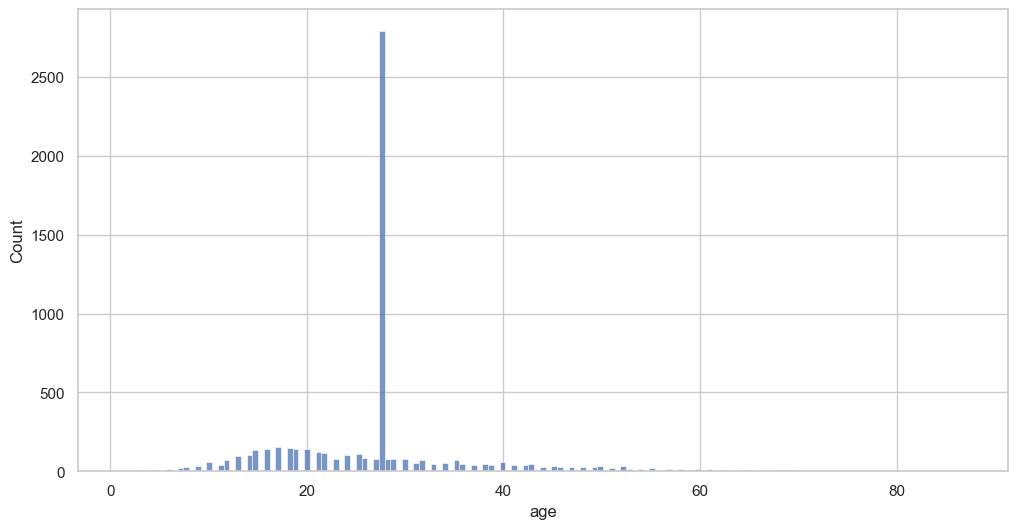

In [84]:
# now yes, finally the 'age' values are int and we can generate a histogram
sns.histplot(data=dfclean, x='age')

In [85]:
# but now we have a peak in year = mean, so this dataset will only be useful where we will not work with age
# if we want to work with the age, we will have to drop these values
dfage = dfclean[dfclean['age']!= 27.37]
dfage.shape

(3352, 16)

<Axes: xlabel='age', ylabel='Count'>

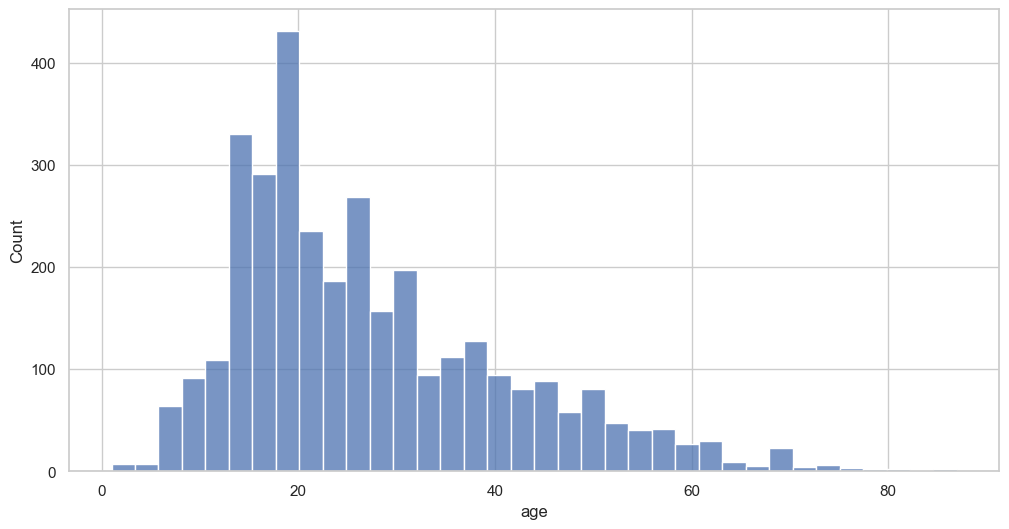

In [86]:
sns.histplot(data=dfage, x='age') # this looks much better

In [87]:
# the first histogram, of the 6142 values of dfclean, is not useful for 'age' numerical analysis
# because there are more than 2500 values that we have converted into the mean (27.37), so we see a peak in the distribution 
# we'll use dfage when we want to work with the age
# and we'll continue working with the dfclean (6142 rows)

In [88]:
# let's first reset the index
dfclean.reset_index(drop=True, inplace=True)

In [89]:
# let's take a look at other problematic columns
dfclean['sex'].unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [90]:
dfclean.sex.value_counts(dropna=False)

sex
M      4959
F       631
NaN     547
M         2
lli       1
N         1
.         1
Name: count, dtype: int64

In [91]:
# we isolate these 2 rows where the gender is 'M '
dfclean[dfclean['sex']=='M ']

,date,year,type,country,area,location,activity,name,sex,age,info_age,injury,fatal (y/n),time,species,investigator or source
563,2014.04.22,2014,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Swimming,male,M,42.00,42,Laceration & puncture wounds to right foot,N,15h30,NaN,"R. Neale, Florida Today, 4/22/2014"
1587,2005.05.15,2005,Unprovoked,AUSTRALIA,Queensland,50 km east of Townsville,Spearfishing,Ben Edelstein,M,27.37,NaN,Severe injury to lower leg,N,NaN,Blacktip shark,"J. Anderson, Townsville Bulletin, 5/21/2005"


In [92]:
dfclean['sex'] = np.where(dfclean['sex']=='M ', 'M', dfclean['sex']) # we change these 2 values
dfclean.sex.value_counts(dropna=False)

sex
M      4961
F       631
NaN     547
lli       1
N         1
.         1
Name: count, dtype: int64

In [93]:
dfclean[dfclean['sex']=='lli']

,date,year,type,country,area,location,activity,name,sex,age,info_age,injury,fatal (y/n),time,species,investigator or source
1624,2004.11.11.b,2004,Unprovoked,USA,California,"Bunkers, Humboldt Bay, Eureka, Humboldt County",Surfing,Brian Kang,lli,38.0,38,"Lacerations to hand, knee & thigh",N,13h30,5.5 m [18'] white shark,"R. Collier, GSAF"


In [94]:
# it looks like a male called Brian
dfclean['sex'] = np.where(dfclean['sex']=='lli', 'M', dfclean['sex']) # we change this value
dfclean.sex.value_counts(dropna=False)

sex
M      4962
F       631
NaN     547
N         1
.         1
Name: count, dtype: int64

In [95]:
dfclean[dfclean['sex']=='N']

,date,year,type,country,area,location,activity,name,sex,age,info_age,injury,fatal (y/n),time,species,investigator or source
4937,1934.07.11,1934,Boating,AUSTRALIA,New South Wales,Cronulla,Fishing,"18' boat, occupants William & Leslie Newton",N,27.37,NaN,No injury to occupants Sharks continually foll...,N,NaN,"Blue pointer, 11'","G.P. Whitley, ref: Daily Telegraph, 7/11/1934 ..."


In [96]:
# the shark attacked or followed a boat with 2 people, one male and one female
# we could duplicate the row and assign 'male' to one and 'female' to the other, but there were other cases with more than one people
# so we will just apply one of the genders and continue the analysis
dfclean['sex'] = np.where(dfclean['sex']=='N', 'F', dfclean['sex']) # we change this value
dfclean.sex.value_counts(dropna=False)

sex
M      4962
F       632
NaN     547
.         1
Name: count, dtype: int64

In [97]:
dfclean[dfclean['sex']=='.']

,date,year,type,country,area,location,activity,name,sex,age,info_age,injury,fatal (y/n),time,species,investigator or source
5436,1908.06.02.R,1908,Sea Disaster,PAPUA NEW GUINEA,New Britain,Matupi,.,NaN,.,27.37,NaN,"Remains of 3 humans recovered from shark, but ...",Y,NaN,Allegedly a 33-foot shark,"Taranaki Herald, 6/2/1908"


In [98]:
# let's just change it to a null
dfclean.loc[5437, 'sex'] = np.nan 
dfclean.sex.value_counts(dropna=False)

sex
M      4962
F       631
NaN     548
.         1
Name: count, dtype: int64

In [99]:
# we don't want NaN values because they don't appear in graphics, so I turn them into a specific string
dfclean.sex.fillna('Unknown', inplace=True)
# I also want to change the names for 'male' and 'female'
dfclean['sex'] = np.where(dfclean['sex']=='M', 'Male', dfclean['sex'])
dfclean['sex'] = np.where(dfclean['sex']=='F', 'Female', dfclean['sex'])
dfclean.sex.value_counts(dropna=False)

sex
Male       4962
Female      631
Unknown     548
.             1
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

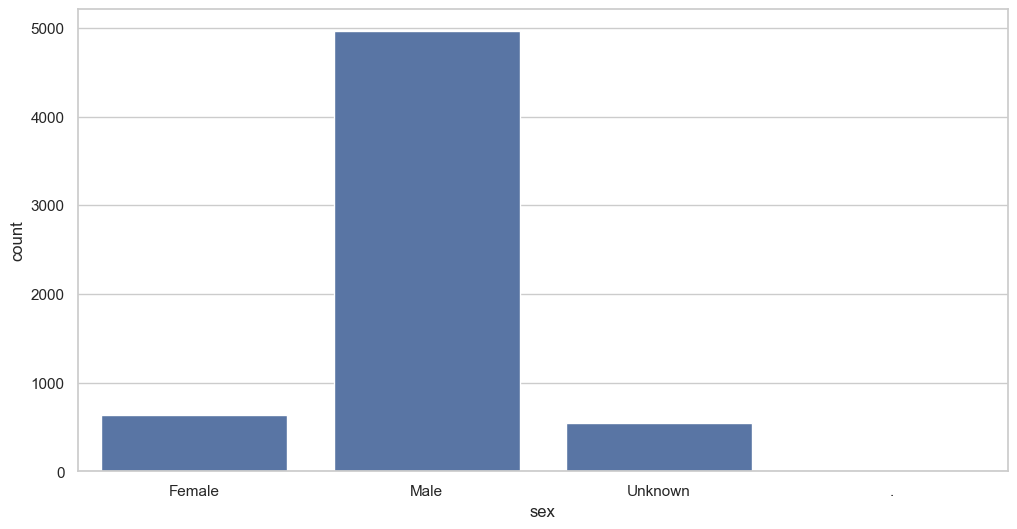

In [100]:
sns.countplot(data=dfclean, x='sex') # so far the raw visualization for 'sex' is the following

<Axes: xlabel='sex', ylabel='count'>

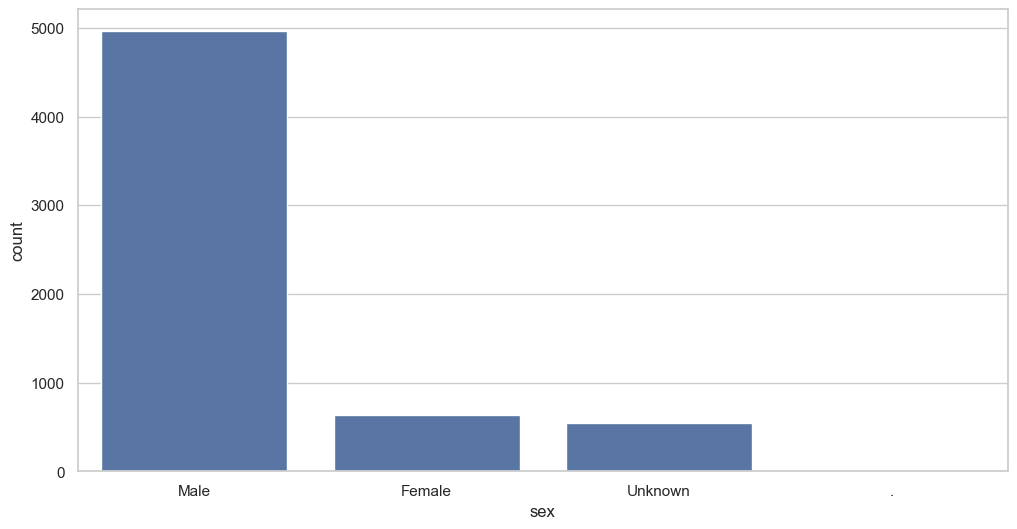

In [101]:
# so far the raw visualization for 'sex' is the following
order = dfclean['sex'].value_counts().index
sns.countplot(data=dfclean, x='sex', order=order) 

In [102]:
dfclean['sex'].value_counts(dropna=False)

sex
Male       4962
Female      631
Unknown     548
.             1
Name: count, dtype: int64

In [103]:
4962/len(dfclean.sex)*100

80.78801693259524

In [104]:
632/len(dfclean.sex)*100

10.289807880169326

In [105]:
548/len(dfclean.sex)*100

8.922175187235428

In [106]:
# let's continue cleaning, we will now clean the 'fatal' column
# let's first change the name of the colum
dfclean.rename(columns={'fatal (y/n)':'fatal'}, inplace=True)
dfclean['fatal'].unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N '], dtype=object)

In [107]:
dfclean['fatal'].value_counts(dropna=False)

fatal
N          4249
Y          1298
NaN         522
UNKNOWN      63
 N            7
M             1
2017          1
N             1
Name: count, dtype: int64

In [108]:
dfclean['fatal'] = dfclean['fatal'].str.strip() # with this method we can eliminate two types
dfclean['fatal'].unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017'], dtype=object)

In [109]:
# let's take a closer look at the odd values
dfclean[dfclean['fatal']=='M']

,date,year,type,country,area,location,activity,name,sex,age,info_age,injury,fatal,time,species,investigator or source
285,2016.04.18.b,2016,Provoked,FRENCH POLYNESIA,Tuamotos,Makemo Atoll,Spearfishing,Hoata Iotua,Male,22.0,22,Laceration to knee by speared shark PROVOKED I...,M,Morning,"Grey reef shark, 2 m","TNTV News, 4/19/2016"


In [110]:
# I searched info of this attack on Google and found that he did not die because of the attack
dfclean.at[285,'fatal'] = 'N' # I change the 'fatal' value to 'N'

In [111]:
# let's take a closer look at the last odd value
dfclean[dfclean['fatal']=='2017']

,date,year,type,country,area,location,activity,name,sex,age,info_age,injury,fatal,time,species,investigator or source
786,2012.06.10,2012,Provoked,ITALY,Sardinia,Muravera,Attempting to rescue an injured & beached shark,Giorgio Zara,Male,57.0,57,Lower left leg injured PROVOKED ACCIDENT,2017,Morning,"Blue shark, 2.5m","D. Puddo, 6/11/2012"


In [112]:
# this could mean he died in 2017, 5 years later. Let's just assume it was not fatal
dfclean.at[786,'fatal'] = 'N' # I change the 'fatal' value to 'N'

In [113]:
dfclean['fatal'].value_counts(dropna=False)

fatal
N          4259
Y          1298
NaN         522
UNKNOWN      63
Name: count, dtype: int64

In [114]:
dfclean['fatal'] = np.where(dfclean['fatal']=='N', 'No', dfclean['fatal'])
dfclean['fatal'] = np.where(dfclean['fatal']=='Y', 'Yes', dfclean['fatal'])
dfclean['fatal'] = np.where(dfclean['fatal']=='UNKNOWN', 'Unknown', dfclean['fatal'])
dfclean['fatal'] = np.where(dfclean['fatal'].isna(), 'Unknown', dfclean['fatal']) # let's turn the nulls into 'Unkown'
dfclean['fatal'].value_counts(dropna=False)

fatal
No         4259
Yes        1298
Unknown     585
Name: count, dtype: int64

<Axes: xlabel='fatal', ylabel='Count'>

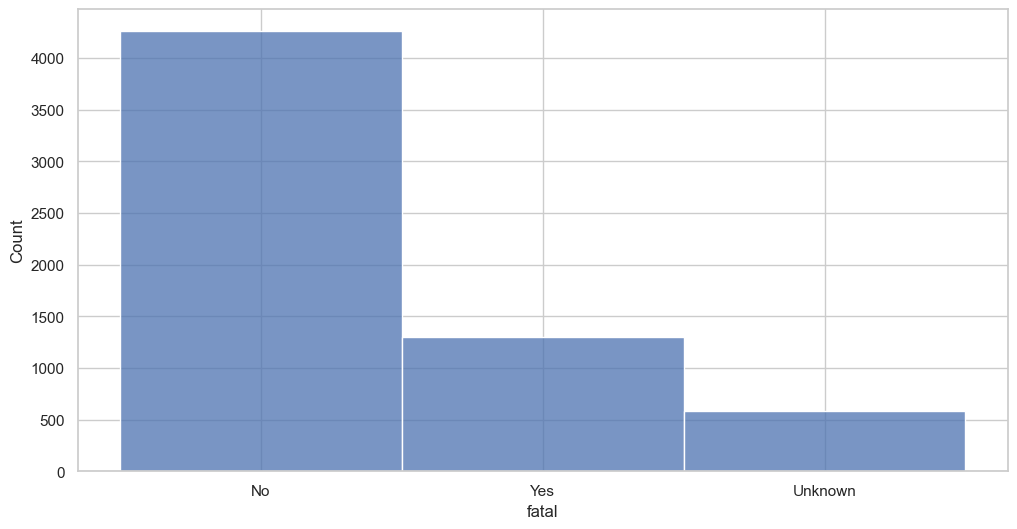

In [115]:
# we have finally cleaned the 'fatal' column, let's do a quick visualization
sns.histplot(data=dfclean, x='fatal')

In [116]:
dfclean.fatal.value_counts(dropna=False)

fatal
No         4259
Yes        1298
Unknown     585
Name: count, dtype: int64

In [117]:
4259/len(dfclean.fatal)*100

69.34223380006512

In [118]:
1298/len(dfclean.fatal)*100

21.13318137414523

In [119]:
585/len(dfclean.fatal)*100

9.524584825789645

In [120]:
# let's continue cleaning, let's analyze now the type
dfclean['type'].value_counts(dropna=False)

type
Unprovoked      4468
Provoked         571
Invalid          532
Sea Disaster     229
Boating          203
Boat             132
NaN                4
Questionable       2
Boatomg            1
Name: count, dtype: int64

In [121]:
# let's get rid of the nulls first
dfclean['type'].fillna('Unknown', inplace=True)
dfclean['type'].value_counts(dropna=False)

type
Unprovoked      4468
Provoked         571
Invalid          532
Sea Disaster     229
Boating          203
Boat             132
Unknown            4
Questionable       2
Boatomg            1
Name: count, dtype: int64

In [122]:
# let's apply regex to change it
dfclean['type'] = np.where(dfclean['type'].str.contains(r"Boat"), 'Boating', dfclean['type'])
dfclean['type'] = np.where(dfclean['type'].str.contains(r"Questionable"), 'Unknown', dfclean['type'])
dfclean['type'] = np.where(dfclean['type'].str.contains(r"Invalid"), 'Unknown', dfclean['type'])
dfclean['type'].value_counts(dropna=False)

type
Unprovoked      4468
Provoked         571
Unknown          538
Boating          336
Sea Disaster     229
Name: count, dtype: int64

In [123]:
dfclean.shape

(6142, 16)

In [124]:
# let's create a subset to get rid of the 'Unknown' values
dftype = dfclean[(dfclean['type']!='Unknown')]
dftype.shape

(5604, 16)

In [125]:
# since we want to analyze the fatality, let's create another subset where we get rid of the 'Unknown' values in fatality.
dftypefatal = dftype[dftype['fatal']!='Unknown']
dftypefatal.shape

(5531, 16)

<Axes: xlabel='type', ylabel='Count'>

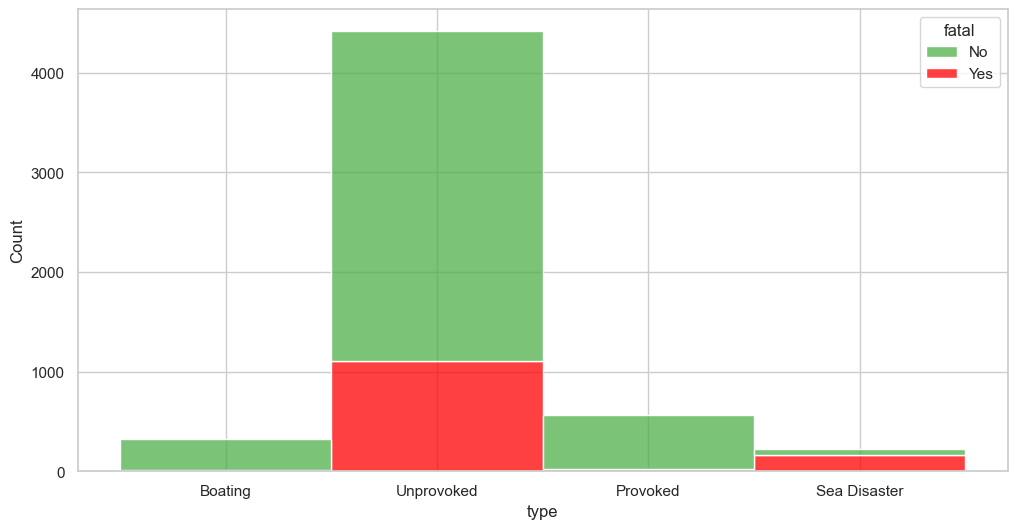

In [126]:
colors = ['#4daf4a', 'red']
sns.histplot(data=dftypefatal, x="type", hue="fatal", multiple="stack", palette=colors)

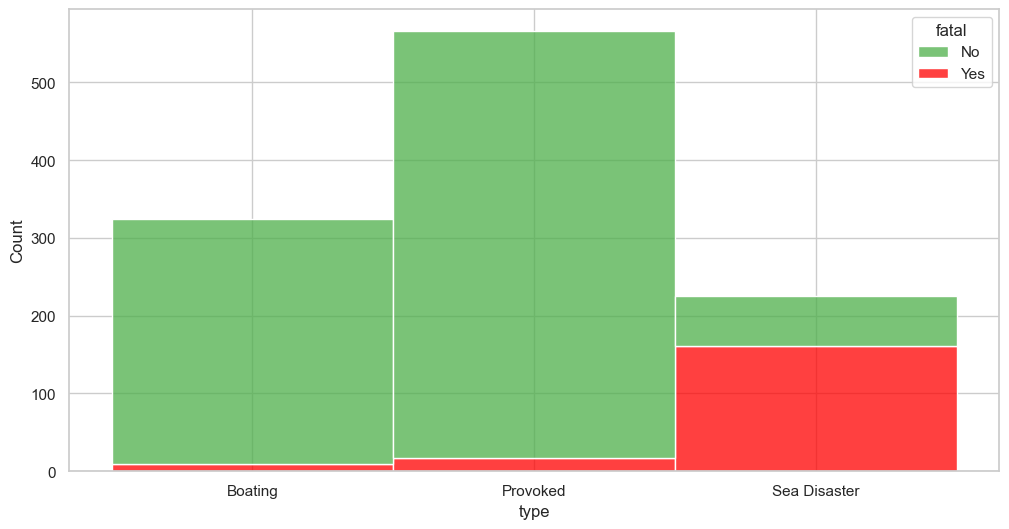

In [127]:
# There are way more 'Unprovoked' cases, let's drop them so I can see better the rest, but no need to create a subset.
colors = ['#4daf4a', 'red']
sns.histplot(data=dftypefatal[dftypefatal['type']!='Unprovoked'], x="type", hue="fatal", multiple="stack", palette=colors);

In [128]:
# this result makes a lot of sense, basically it tells us that in sea disasters people are more likely to die
# probably because they are far away from the coast

In [129]:
# let's continue cleaning, let's analyze now the countries
# let's title the countries
dfclean.country = dfclean.country.apply(lambda i:i.title())
dfclean.sample(4)

,date,year,type,country,area,location,activity,name,sex,age,info_age,injury,fatal,time,species,investigator or source
5925,1868.00.00.a,1868,Unprovoked,New Zealand,North Island,"Brickfield Bay, Auckland Harbour",Bathing close inshore,Cook,Male,27.37,NaN,Thigh bitten,No,NaN,"""Shark caught later""",V.M. Coppleson (1958) (May refer to Thomas Co...
4379,1953.04.04,1953,Unprovoked,Usa,Texas,South Padre Island,Swimming,Susan Smith,Female,19.00,19,Lacerations to right foot,No,Afternoon,NaN,"Valley Morning Star, 4/5/1953"
2320,1996.01.23,1996,Provoked,Usa,Florida,"Florida Keys, Monroe County",Wading,Christopher Riley,Male,33.00,33,Shark bit his leg after he grabbed its tail & ...,No,NaN,"Nurse shark, 0.9 m [3']","Miami Herald, 1/25/1996"
5555,1900.09.05,1900,Unprovoked,Usa,Hawaii,"Waikiki Beach, Oahu",Floating,Joe Hartman,Male,27.37,NaN,"Bathing suit torn & ""imprints of the shark's t...",No,Afternoon,NaN,"Honolulu Republican, 9/6/1900"


In [130]:
len(dfclean.country.unique())

199

In [131]:
# So many countries, let's take a quick look at them
countries_valuecounts = dfclean.country.unique() # to get all the countries
countries_list = list(countries_valuecounts) # store them in a list
countries_list.sort() # sort the list alphabetically
print(', '.join(countries_list)) # to see the full list, but I have to scroll to the right and I don't see clearly the full name
countries_list # I see it better, though the output is truncated

 Philippines,  Tonga, Admiralty Islands, American Samoa, Andaman / Nicobar Islandas, Andaman Islands, Angola, Antigua, Argentina, Aruba, Asia?, Atlantic Ocean, Australia, Azores, Bahamas, Bahrein, Bangladesh, Barbados, Bay Of Bengal, Belize, Bermuda, Brazil, British Isles, British New Guinea, British Virgin Islands, British West Indies, Burma, Canada, Cape Verde, Caribbean Sea, Cayman Islands, Central Pacific, Ceylon, Chile, China, Columbia, Comoros, Cook Islands, Costa Rica, Crete, Croatia, Cuba, Curacao, Cyprus, Diego Garcia, Djibouti, Dominican Republic, Ecuador, Egypt, Egypt , Egypt / Israel, El Salvador, England, Equatorial Guinea / Cameroon, Falkland Islands, Federated States Of Micronesia, Fiji, France, French Polynesia, Gabon, Georgia, Grand Cayman, Greece, Grenada, Guam, Guatemala, Guinea, Gulf Of Aden, Guyana, Haiti, Honduras, Hong Kong, Iceland, India, Indian Ocean, Indian Ocean?, Indonesia, Iran, Iran / Iraq, Iraq, Ireland, Israel, Italy, Italy / Croatia, Jamaica, Japan, Ja

[' Philippines',
 ' Tonga',
 'Admiralty Islands',
 'American Samoa',
 'Andaman / Nicobar Islandas',
 'Andaman Islands',
 'Angola',
 'Antigua',
 'Argentina',
 'Aruba',
 'Asia?',
 'Atlantic Ocean',
 'Australia',
 'Azores',
 'Bahamas',
 'Bahrein',
 'Bangladesh',
 'Barbados',
 'Bay Of Bengal',
 'Belize',
 'Bermuda',
 'Brazil',
 'British Isles',
 'British New Guinea',
 'British Virgin Islands',
 'British West Indies',
 'Burma',
 'Canada',
 'Cape Verde',
 'Caribbean Sea',
 'Cayman Islands',
 'Central Pacific',
 'Ceylon',
 'Chile',
 'China',
 'Columbia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Crete',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Diego Garcia',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Egypt ',
 'Egypt / Israel',
 'El Salvador',
 'England',
 'Equatorial Guinea / Cameroon',
 'Falkland Islands',
 'Federated States Of Micronesia',
 'Fiji',
 'France',
 'French Polynesia',
 'Gabon',
 'Georgia',
 'Grand Cayman',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',


In [132]:
# first clean
dfclean['country'] = dfclean['country'].str.strip() # I delete the spaces in the beginning or end of the string

In [133]:
len(dfclean.country.unique())

191

In [134]:
# before it was 199, so we've cleaned 8 countries
# there are some places that are not countries
dfclean[dfclean['country']=='Azores'].shape

(5, 16)

In [135]:
dfclean['area'] = np.where(dfclean['country']=='Azores', 'Azores', dfclean['area']) # where 'Azores' is in country, put it in 'area'
dfclean['country'] = np.where(dfclean['country']=='Azores', 'Portugal', dfclean['country']) # where 'Azores' is in country, write 'Portugal'
len(dfclean.country.unique())

190

In [136]:
# there are some places that are not countries
dfclean[dfclean['country']=='Columbia'].shape # not well written

(9, 16)

In [137]:
dfclean['country'] = np.where(dfclean['country']=='Columbia', 'Colombia', dfclean['country']) # where 'Columbia' is in country, write 'Colombia'

In [138]:
# there are some places that are not countries
dfclean[dfclean['country']=='England'].shape

(16, 16)

In [139]:
# there are some places that are not countries
dfclean['country'] = np.where(dfclean['country']=='England', 'United Kingdom', dfclean['country']) # where 'England' is in country, write 'United Kingdom'
dfclean['country'] = np.where(dfclean['country']=='Scotland', 'United Kingdom', dfclean['country']) # where 'Scotland' is in country, write 'United Kingdom'
len(dfclean.country.unique())

188

In [140]:
 # The Andaman & Nicobar Islands is a union territory of India
dfclean['area'] = np.where(dfclean['country']=='Andaman / Nicobar Islandas', 'Andaman & Nicobar Islands', dfclean['area']) # I put the name in 'area'
dfclean['country'] = np.where(dfclean['country']=='Andaman / Nicobar Islandas', 'India', dfclean['country']) # I put the right name in 'country'
dfclean.country.nunique()

187

In [141]:
 # Reunion is an island of France in the Indian Ocean
dfclean['area'] = np.where(dfclean['country']=='Reunion', 'Reunion', dfclean['area']) # I put the name in 'area'
dfclean['country'] = np.where(dfclean['country']=='Reunion', 'France', dfclean['country']) # I put the right name in 'country'
dfclean.country.nunique()

186

In [142]:
# it can take a looong time, so I will just do this for the top values, since I'm gonna put together all the countries where value_counts < 5
dfclean['country'].value_counts().head(80)

country
Usa                     2197
Australia               1311
South Africa             577
Papua New Guinea         134
New Zealand              128
                        ... 
Palau                      5
Saudi Arabia               5
Turks & Caicos             5
Malta                      5
North Atlantic Ocean       5
Name: count, Length: 80, dtype: int64

In [143]:
country_namestop = list(dfclean['country'].value_counts().head(80).index) # the countries where there have been at least 5 attacks
country_namesall = list(dfclean['country'].value_counts().index) # all the countries
# let's first change the name of the colum 'country
dfclean.rename(columns={'country':'info_country'}, inplace=True)

dfclean['country'] = dfclean['info_country'].apply(lambda x: 'Other' if x not in country_namestop else x) # the function where I substitute the least frequent countries with 'Other'
dfclean # I create a new column 'country' because I want to keep the original information of the country just in case in the column 'info_country', which I have just changed the name

,date,year,type,info_country,area,location,activity,name,sex,age,info_age,injury,fatal,time,species,investigator or source,country
0,2018.06.25,2018,Boating,Usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,Female,57.00,57,"No injury to occupant, outrigger canoe and pad...",No,18h00,White shark,"R. Collier, GSAF",Usa
1,2018.06.18,2018,Unprovoked,Usa,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,Female,11.00,11,Minor injury to left thigh,No,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",Usa
2,2018.06.09,2018,Unknown,Usa,Hawaii,"Habush, Oahu",Surfing,John Denges,Male,48.00,48,Injury to left lower leg from surfboard skeg,No,07h45,NaN,"K.McMurray, TrackingSharks.com",Usa
3,2018.06.08,2018,Unprovoked,Australia,New South Wales,Arrawarra Headland,Surfing,male,Male,27.37,NaN,Minor injury to lower leg,No,NaN,2 m shark,"B. Myatt, GSAF",Australia
4,2018.06.04,2018,Provoked,Mexico,Colima,La Ticla,Free diving,Gustavo Ramos,Male,27.37,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,No,NaN,"Tiger shark, 3m",A .Kipper,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6137,ND.0006,1905,Unprovoked,Australia,New South Wales,,Swimming,Arab boy,Male,27.37,NaN,FATAL,Yes,NaN,Said to involve a grey nurse shark that leapt ...,"L. Becke in New York Sun, 9/9/1906; L. Schultz...",Australia
6138,ND.0005,1902,Unprovoked,Australia,Western Australia,Roebuck Bay,Diving,male,Male,27.37,NaN,FATAL,Yes,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",Australia
6139,ND.0004,1902,Unprovoked,Australia,Western Australia,NaN,Pearl diving,Ahmun,Male,27.37,NaN,FATAL,Yes,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",Australia
6140,ND.0003,1902,Unprovoked,Usa,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,Male,27.37,NaN,FATAL,Yes,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",Usa


In [144]:
dfclean.columns # I get the names of the columns to set a new order

Index(['date', 'year', 'type', 'info_country', 'area', 'location', 'activity',
       'name', 'sex', 'age', 'info_age', 'injury', 'fatal', 'time', 'species',
       'investigator or source', 'country'],
      dtype='object')

In [145]:
columns2 = ['date', 'year', 'type', 'country', 'info_country', 'area', 'location', 'activity',
       'name', 'sex', 'age', 'info_age', 'injury', 'fatal', 'time', 'species',
       'investigator or source']
dfclean = dfclean.reindex(columns=columns2) # now they are side by side
dfclean.sample() # let's see how it looks

,date,year,type,country,info_country,area,location,activity,name,sex,age,info_age,injury,fatal,time,species,investigator or source
4619,1945.08.06,1945,Unprovoked,Usa,Usa,North Carolina,Ocracoke,NaN,Kuenzler,Unknown,27.37,NaN,FATAL,Yes,NaN,NaN,"F. Schwartz, p.23"


In [146]:
dfclean[dfclean['country']=='Other']

,date,year,type,country,info_country,area,location,activity,name,sex,age,info_age,injury,fatal,time,species,investigator or source
23,2018.04.23,2018,Unprovoked,Other,Maldives,Alifu Alifu Atoll,Madoogali,Fishing,Ahmed Rasheed,Male,32.00,32,5-inch cut to hand,No,21h50,Tiger shark,"K. McMurray, TrackingSharks.com"
111,2017.07.24,2017,Unprovoked,Other,"St Helena, British Overseas Territory",Ascension Island,English Bay,Surfing,Kawika Matsu,Male,37.00,37,Torso bitten,No,17h00,NaN,"Telegraph UK, 7/28/2017"
124,2017.07.02,2017,Unknown,Other,Comoros,Anjouan,Moya,Fishing,NaN,Unknown,27.37,NaN,"Skull found in shark, a probable drowning & sc...",Unknown,NaN,Shark involvement prior to death not confirmed,"Linfo, 7/3/2017"
142,2017.05.12,2017,Unprovoked,Other,United Arab Emirates,"Sharjah,",Khor Fakkan,Spearfishing,Al Beloushi,Male,41.00,41,Right leg severely bitten,No,Morning,NaN,"Gulf News, 5/13/2017"
152,2017.04.22,2017,Unprovoked,Other,"St Helena, British Overseas Territory",Ascension Island,English Bay,Snorkeling,Frankie Gonsalves,Female,40.00,40,Calf & foot bitten,No,16h00,NaN,"Daily Mail, 4/25/2017"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6078,ND.0076,1901,Unprovoked,Other,Mediterranean Sea,NaN,NaN,NaN,"male, a ship carpenter",Male,27.37,NaN,FATAL,Yes,NaN,NaN,"W.H. Gregg, p.22; L. Schultz & M. Malin, ..."
6114,ND.0033,1904,Provoked,Other,Burma,NaN,NaN,Carrying a supposedly dead shark by its mouth,boy,Male,27.37,NaN,4 fingers severed by 'dead' shark. PROVOKED AC...,No,NaN,NaN,"Massillon Independent, 3/1905"
6117,ND.0030,1904,Unprovoked,Other,Burma,NaN,NaN,Bathing,male,Male,27.37,NaN,Fatal x 2,Yes,NaN,NaN,"Massillon Independent, 3/1905"
6119,ND.0026,1932,Unprovoked,Other,Belize,NaN,NaN,Standing,a servant,Male,16.00,16,FATAL,Yes,NaN,12' tiger shark,Mitchell-Hedges


In [147]:
174/len(dfclean.country)*100

2.832953435363074

In [148]:
# there are 174 cases out of 6142 (2.83%) where the original country (or location) has been replaced by 'Other'
# so we can accept it, now the df is much cleaner

In [149]:
# even though now we have less than half the countries, there are still many, it's quite messy
dfclean['country'].value_counts().head(10)

country
Usa                 2197
Australia           1311
South Africa         577
Other                174
Papua New Guinea     134
New Zealand          128
Brazil               111
Bahamas              109
Mexico                86
Italy                 68
Name: count, dtype: int64

In [150]:
# we can clearly see that shark attacks happened in mainly 3 countries (USA, Australia and South Africa)

In [151]:
# let's get a countplot with the top 20 countries
country_namestop = list(dfclean['country'].value_counts().head(20).index)
country_namesall = list(dfclean['country'].value_counts().index) # all the countries
 # the function where I substitute the least frequent countries with 'Other'
dfclean['country'] = dfclean['country'].apply(lambda x: 'Other' if x not in country_namestop else x)
dfclean['country'].value_counts()

country
Usa                 2197
Australia           1311
Other                933
South Africa         577
Papua New Guinea     134
New Zealand          128
Brazil               111
Bahamas              109
Mexico                86
France                68
Italy                 68
Fiji                  63
Philippines           62
New Caledonia         53
Mozambique            45
Cuba                  42
Spain                 41
Unknown               40
Egypt                 39
United Kingdom        35
Name: count, dtype: int64

In [152]:
# let's group 'Unknown' with 'Other'
dfclean['country'] = np.where(dfclean['country']=='Unknown', 'Other', dfclean['country'])

<Axes: xlabel='count', ylabel='country'>

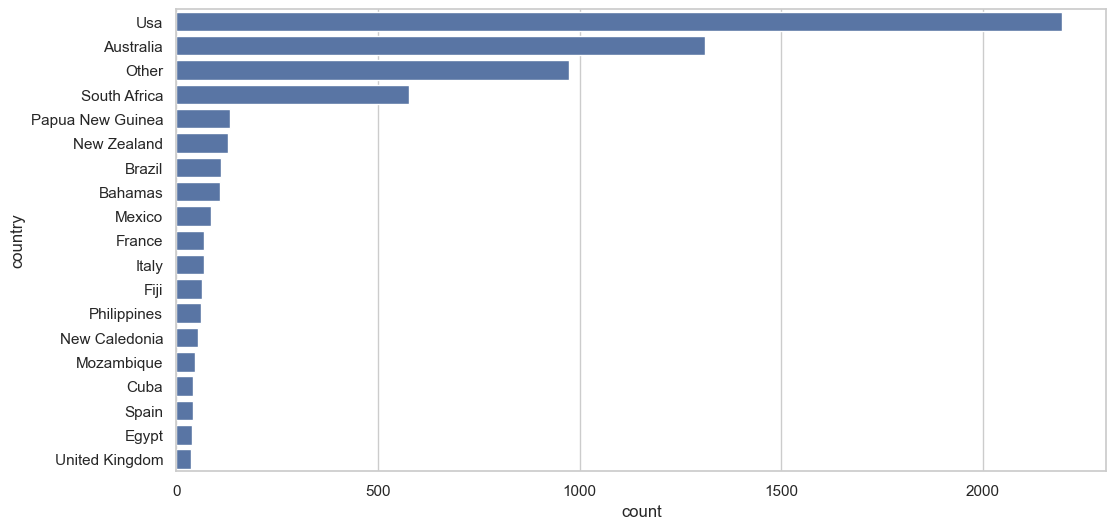

In [153]:
# let's try to get a countplot
order = dfclean.country.value_counts().index
sns.countplot(data=dfclean, y='country', order=order) # I put the countries in the y axis so I can read the names

In [154]:
# let's try to get out the 'Other' values in the 'country' column so that they don't appear in the graph
# I don't want to just delete them, so I'll make a copy of the df
dfcountries = dfclean[dfclean['country']!='Other']
dfcountries['country'].value_counts()

country
Usa                 2197
Australia           1311
South Africa         577
Papua New Guinea     134
New Zealand          128
Brazil               111
Bahamas              109
Mexico                86
France                68
Italy                 68
Fiji                  63
Philippines           62
New Caledonia         53
Mozambique            45
Cuba                  42
Spain                 41
Egypt                 39
United Kingdom        35
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='country'>

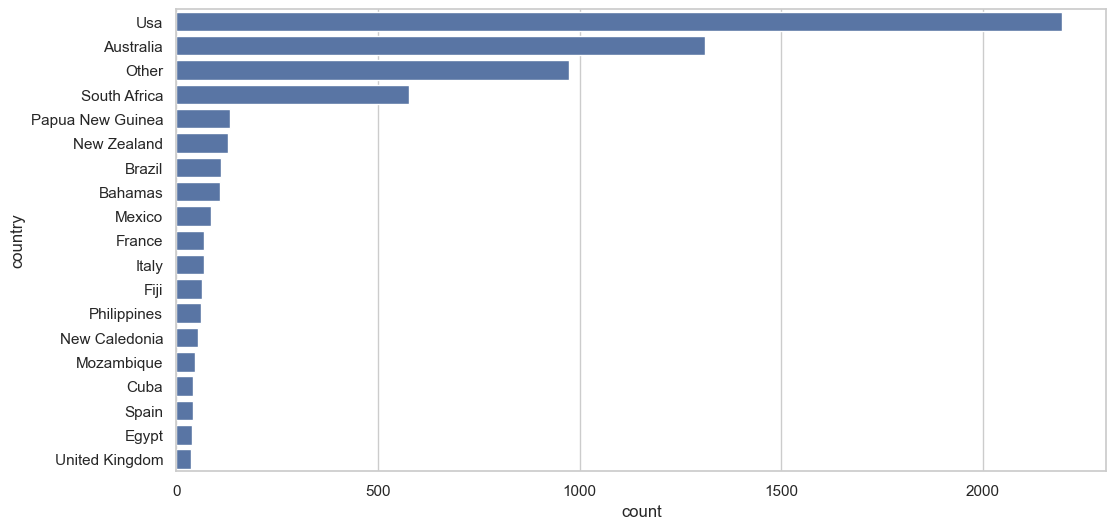

In [155]:
# let's run again the countplot
order = dfclean.country.value_counts().index
sns.countplot(data=dfclean, y='country', order=order)

In [156]:
# let's analize the activity and try to relate it to the fatality
dfclean.activity.value_counts()

activity
Surfing                                                        969
Swimming                                                       835
Fishing                                                        426
Spearfishing                                                   333
Wading                                                         146
                                                              ... 
Spearfishing / freediving                                        1
Attempted to return injured shark to the sea                     1
Motor launch Baby Princesa capsized with 22 people on board      1
Sea Disaster Sinking of ferryboat Christina                      1
Wreck of  large double sailing canoe                             1
Name: count, Length: 1497, dtype: int64

In [157]:
dfclean.activity.isna().sum() # let's see if we have nulls

504

In [158]:
# we have several nulls, we have to get rid of them in order to analize the df
dfclean.activity.fillna('Unknown', inplace=True)
dfclean.activity.isna().sum() # let's see if it has been changed correctly

0

In [159]:
dfclean.activity.nunique()

1497

In [160]:
dfclean['activity'] = dfclean['activity'].str.strip()
dfclean.activity.nunique()

1469

In [161]:
# too many activities, 1469, let's take a look at the most common activities
dfclean.activity.value_counts().head(30)

activity
Surfing            974
Swimming           881
Unknown            507
Fishing            439
Spearfishing       340
Bathing            147
Wading             146
Diving             130
Standing           100
Snorkeling          89
Scuba diving        77
Body boarding       62
Body surfing        50
Kayaking            35
Treading water      32
Pearl diving        30
Free diving         30
Boogie boarding     29
Fell overboard      28
Windsurfing         19
Surf skiing         19
Walking             17
Boogie Boarding     16
Floating            15
Shark fishing       15
Rowing              14
Canoeing            13
Surf fishing        12
Surf-skiing         12
Kayak Fishing       11
Name: count, dtype: int64

In [162]:
# let's take a look at the least common activities
dfclean.activity.value_counts().tail(30)

activity
Fishing boat swamped in a storm                                                                          1
Hookah diving (submerged)                                                                                1
Free diving (but on surface)                                                                             1
Adrift after the sinking of the motor yacht Princess Dianne                                              1
Free diving for abalone (submerged)                                                                      1
3.3 m fishing boat sank. Treveluwe & Peter Hodgson (wearing lifejackets) were drifting in the current    1
Swimming underwater from crayfish cage to a fishing bait                                                 1
Ferry capsized                                                                                           1
Attempting to drag hooked shark ashore by its tail                                                       1
Scuba diving & feeding fish 

In [163]:
# there's just too much detail, many of them could be converted to common activities such as 'Swimming' of 'Fishing'

In [164]:
dfclean[dfclean['activity']=="Fishing"].shape # rows where now activity = 'Fishing'

(439, 17)

In [165]:
# so we discovered around 200 cases where we can simplify the activity to just 'Fishing', let's do it
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"Fishing"), 'Fishing', dfclean['activity'])
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"Spearfishing"), 'Fishing', dfclean['activity'])
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"Spear"), 'Fishing', dfclean['activity'])
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"fishing"), 'Fishing', dfclean['activity'])

dfclean[dfclean['activity']=='Fishing'].shape # rows where now activity = 'Fishing'

(1171, 17)

In [166]:
dfclean[dfclean['activity']=="Swimming"].shape # rows where now activity = 'Swimming'

(881, 17)

In [167]:
# let's group 'Swimming'
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"Swimming"), 'Swimming', dfclean['activity'])
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"swimming"), 'Swimming', dfclean['activity'])
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"treading water"), 'Swimming', dfclean['activity'])
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"Treading water"), 'Swimming', dfclean['activity'])

# let's group as well 'Snorkeling' with 'Swimming', since it's basically the same, the only difference when you snorkel you have goggles
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"Snorkeling"), 'Swimming', dfclean['activity'])

# 'Bathing' and 'Swimming' look very similar, let's group them
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"Bathing"), 'Swimming', dfclean['activity'])
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"bathing"), 'Swimming', dfclean['activity'])

dfclean[dfclean['activity']=='Swimming'].shape # rows where now activity = 'Swimming'

(1380, 17)

In [168]:
dfclean[dfclean['activity']=="Surfing"].shape # rows where now activity = 'Surfing'

(974, 17)

In [169]:
# let's group 'Surfing'
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"Surf"), 'Surfing', dfclean['activity'])
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"surf"), 'Surfing', dfclean['activity'])
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"Body"), 'Surfing', dfclean['activity'])
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"Bodyboarding"), 'Surfing', dfclean['activity'])
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"boarding"), 'Surfing', dfclean['activity'])
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"Boarding"), 'Surfing', dfclean['activity'])
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"Windsurfing"), 'Surfing', dfclean['activity'])
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"Wind surfing"), 'Surfing', dfclean['activity'])
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"Body surfing"), 'Surfing', dfclean['activity'])
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"Sitting on surfboard"), 'Surfing', dfclean['activity'])
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"Surfng"), 'Surfing', dfclean['activity'])
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"Surf paddling"), 'Surfing', dfclean['activity'])

dfclean[dfclean['activity']=='Surfing'].shape # rows where now activity = 'Surfing'

(1347, 17)

In [170]:
dfclean[dfclean['activity']=="Diving"].shape # rows where now activity = 'Diving'

(130, 17)

In [171]:
# let's group 'Diving'
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"Div"), 'Diving', dfclean['activity'])
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"diving"), 'Diving', dfclean['activity'])

dfclean[dfclean['activity']=='Diving'].shape # rows where now activity = 'Diving'

(516, 17)

In [172]:
dfcountries[dfcountries['activity']=='Wading'].shape # rows where now activity = 'Wading'

(138, 17)

In [173]:
# let's group 'Wading'
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"Wading"), 'Wading', dfclean['activity'])
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"Walking"), 'Wading', dfclean['activity'])
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"wading"), 'Wading', dfclean['activity'])
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"standing"), 'Wading', dfclean['activity'])
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"Standing"), 'Wading', dfclean['activity'])

dfclean[dfclean['activity']=='Wading'].shape # rows where now activity = 'Wading'

(306, 17)

In [174]:
dfclean.activity.nunique()

663

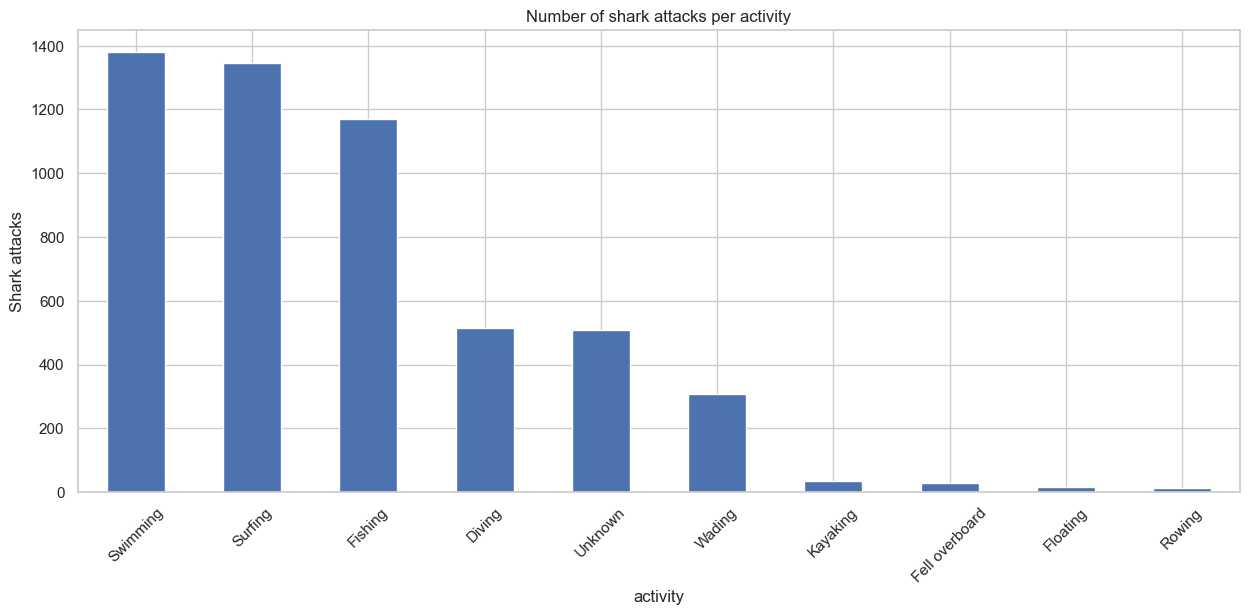

In [175]:
# let's use plt to get more functions
plt.figure(figsize=(15, 6)) # I want to see it bigger
dfclean['activity'].value_counts().head(10).plot(kind="bar", title="Number of shark attacks per activity") # we are only interested in the 10 most common activities
plt.xticks(rotation=45) # we tilt the names of the countries so we can see them
plt.ylabel("Shark attacks");

In [176]:
other_activities = list(dfclean['activity'].value_counts().head(6).index) # let's take only the most common activities
all_activities = list(dfclean['activity'].value_counts().index)
dfclean['activity'] = dfclean['activity'].apply(lambda x: 'Other' if x not in other_activities else x)
dfclean['activity'] = np.where(dfclean['activity'].str.contains(r"Unknown"), 'Other', dfclean['activity'])
dfclean['activity'].value_counts()

activity
Other       1422
Swimming    1380
Surfing     1347
Fishing     1171
Diving       516
Wading       306
Name: count, dtype: int64

In [177]:
# before generating a graph, as usual, we have to get rid of the nulls, so we make a copy
dfactivities = dfclean[dfclean['activity']!= 'Other' ]
dfactivities.shape

(4720, 17)

In [178]:
dfclean.shape

(6142, 17)

In [179]:
6142-4720

1422

In [180]:
4720/6142*100

76.84793226961901

In [181]:
# in order to analyze only the top 5 activities, we have got rid of 1422 rows, only keeping 77% of the original df (dfclean)
# if we want to analyze the fatality out of it, we have to get rid of the 'Unknown' values, so let's create another subset.

dffatalactivities = dfactivities[(dfactivities['fatal']=='Yes') | (dfactivities['fatal']=='No')]
dffatalactivities.shape

(4383, 17)

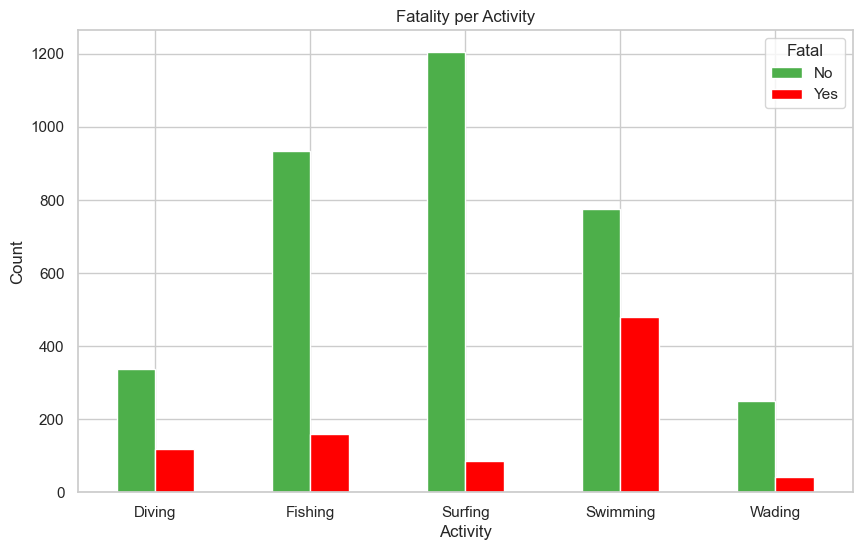

In [182]:
# fatality per activity
crosstab = pd.crosstab(dffatalactivities['activity'], dffatalactivities['fatal'])
colors = ['#4daf4a', 'red']
crosstab.plot(kind='bar', figsize=(10, 6), color=colors)

plt.title('Fatality per Activity')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Fatal')
plt.show()

In [183]:
pd.crosstab(dffatalactivities['activity'], dffatalactivities['fatal'])

fatal,No,Yes
activity,,
Diving,338,118
Fishing,934,160
Surfing,1204,86
Swimming,774,478
Wading,249,42


In [184]:
dffatalactivities['activity'].value_counts()

activity
Surfing     1290
Swimming    1252
Fishing     1094
Diving       456
Wading       291
Name: count, dtype: int64

In [185]:
# we can observe there's a higher ratio of fatality amongst people who were swimming or diving,
# compared to the ones who were surfing or fishing
print(f"Fatality of Swimming: {round((478/1252)*100, 2)}%")
print(f"Fatality of Diving: {round((118/456)*100, 2)}%")
print(f"Fatality of Fishing: {round((160/1094)*100, 2)}%")
print(f"Fatality of Wading: {round((42/291)*100, 2)}%")
print(f"Fatality of Surfing: {round((86/1290)*100, 2)}%")

Fatality of Swimming: 38.18%
Fatality of Diving: 25.88%
Fatality of Fishing: 14.63%
Fatality of Wading: 14.43%
Fatality of Surfing: 6.67%


In [186]:
dfage = dfclean[dfclean['age']!= 27.37]

In [187]:
dfage = dfactivities[dfactivities['age']!= 27.37]

In [188]:
dfage.shape

(2923, 17)

In [189]:
dfFlorida = dfactivities[dfactivities['area']=='Florida']
dfFlorida['activity'].value_counts()

activity
Surfing     445
Swimming    185
Wading      119
Fishing      97
Diving       43
Name: count, dtype: int64

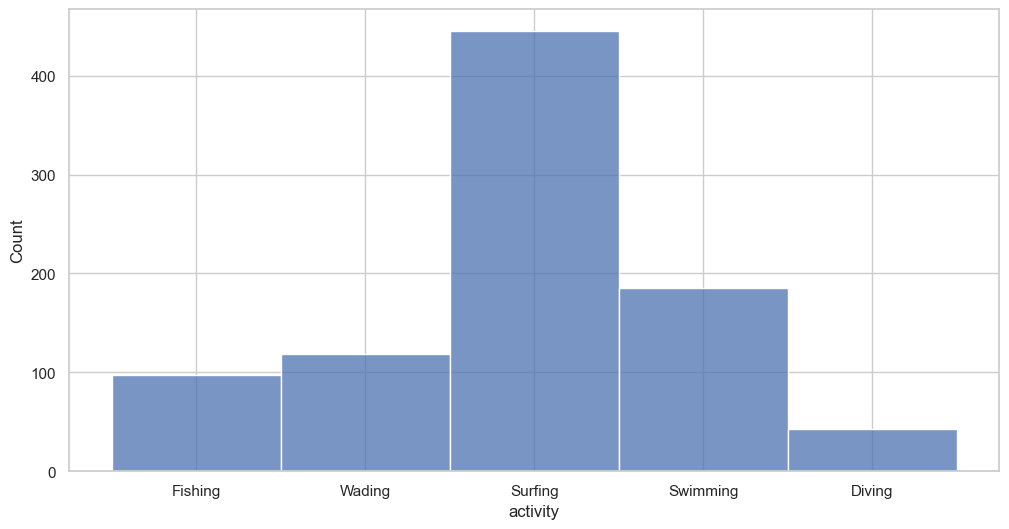

In [190]:
sns.histplot(data=dfFlorida, x="activity");

In [191]:
print(dfclean.species.nunique())
dfclean.species.value_counts().head(20)

1543


species
White shark                                           162
Shark involvement prior to death was not confirmed    105
Invalid                                               100
Shark involvement not confirmed                        88
Tiger shark                                            73
Shark involvement prior to death unconfirmed           59
Bull shark                                             52
4' shark                                               40
6' shark                                               40
1.8 m [6'] shark                                       35
Questionable incident                                  35
Questionable                                           33
1.5 m [5'] shark                                       32
1.2 m [4'] shark                                       27
3' shark                                               26
5' shark                                               26
2 m shark                                              25
4' to 

In [192]:
# let's apply regex to change it

dfclean['species'] = np.where(dfclean['species'].str.contains(r"White shark"), 'White shark', dfclean['species'])
dfclean['species'] = np.where(dfclean['species'].str.contains(r"white shark"), 'White shark', dfclean['species'])

dfclean['species'] = np.where(dfclean['species'].str.contains(r"Bull shark"), 'Bull shark', dfclean['species'])
dfclean['species'] = np.where(dfclean['species'].str.contains(r"bull"), 'Bull shark', dfclean['species'])
dfclean['species'] = np.where(dfclean['species'].str.contains(r"Zambezi"), 'Bull shark', dfclean['species'])
dfclean['species'] = np.where(dfclean['species'].str.contains(r"zambezi"), 'Bull shark', dfclean['species'])
dfclean['species'] = np.where(dfclean['species'].str.contains(r"mbesi"), 'Bull shark', dfclean['species'])

dfclean['species'] = np.where(dfclean['species'].str.contains(r"tiger shark"), 'Tiger shark', dfclean['species'])
dfclean['species'] = np.where(dfclean['species'].str.contains(r"Tiger shark"), 'Tiger shark', dfclean['species'])

dfclean['species'] = np.where(dfclean['species'].str.contains(r"lacktip"), 'Blacktip shark', dfclean['species'])

dfclean['species'] = np.where(dfclean['species'].str.contains(r"not confirmed"), 'Unknown', dfclean['species'])
dfclean['species'] = np.where(dfclean['species'].str.contains(r"unconfirmed"), 'Unknown', dfclean['species'])
dfclean['species'] = np.where(dfclean['species'].str.contains(r"No shark"), 'Unknown', dfclean['species'])
dfclean['species'] = np.where(dfclean['species'].str.contains(r"Questionable"), 'Unknown', dfclean['species'])
dfclean['species'] = np.where(dfclean['species'].str.contains(r"Invalid"), 'Unknown', dfclean['species'])
dfclean['species'] = np.where(dfclean['species'].str.contains(r"^\d"), 'Unknown', dfclean['species'])

print(dfclean.species.nunique())
# different species in all the countries
dfclean.species.value_counts().head(10)

540


species
White shark        3333
Unknown            1416
Tiger shark         278
Bull shark          216
Blacktip shark      101
Wobbegong shark      21
Blue shark           14
Mako shark           13
"a small shark"      13
Nurse shark          12
Name: count, dtype: int64

In [193]:
# we will just focus on the 3 most common species, so we'll create a subset
dftop3species = dfclean[(dfclean.species =='White shark') | (dfclean.species =='Bull shark') | (dfclean.species =='Tiger shark')]
dftop3species.shape

(3827, 17)

In [194]:
dftop3species.to_csv("dftop3species.csv", index=False)

In [194]:
dftop3speciesfatal = dftop3species[(dftop3species.fatal!='Unknown')]
dftop3speciesfatal.shape

(3743, 17)

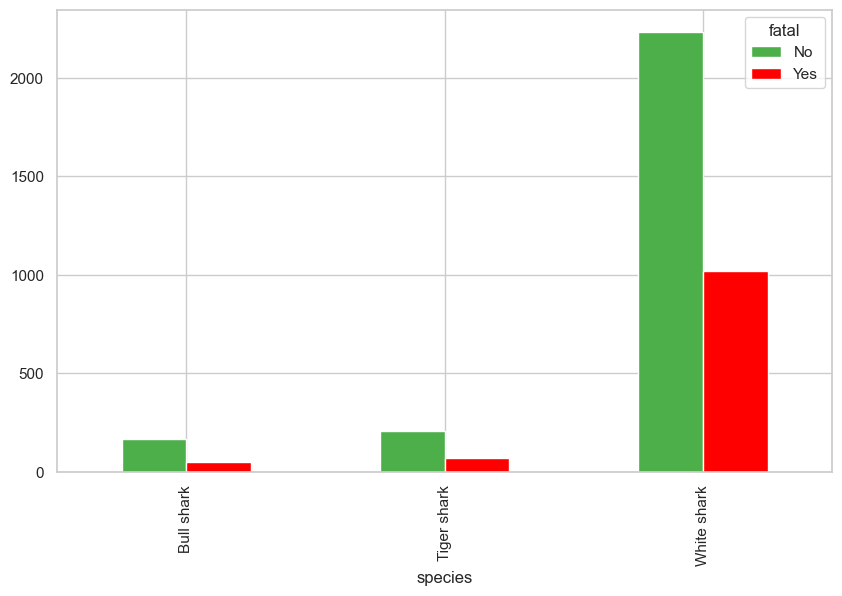

In [195]:
 # fatality per species
crosstab = pd.crosstab(dftop3speciesfatal['species'], dftop3speciesfatal.fatal)
colors = ['#4daf4a', 'red']
crosstab.plot(kind='bar', figsize=(10, 6), color=colors)
plt.show()

In [196]:
pd.crosstab(dftop3speciesfatal['species'], dftop3speciesfatal.fatal)

fatal,No,Yes
species,,
Bull shark,166,49
Tiger shark,206,68
White shark,2234,1020


In [197]:
dftop3speciesfatal['species'].value_counts()

species
White shark    3254
Tiger shark     274
Bull shark      215
Name: count, dtype: int64

In [198]:
# the White shark is the species with more registered attacks,
# although the Tiger shark is slightly more fatal

print(f"Fatality of Tiger Shark: {round((68/274)*100, 2)}%")
print(f"Fatality of White Shark: {round((142/618)*100, 2)}%")
print(f"Fatality of Bull Shark: {round((49/215)*100, 2)}%")

Fatality of Tiger Shark: 24.82%
Fatality of White Shark: 22.98%
Fatality of Bull Shark: 22.79%


In [199]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [200]:
import geopandas as gpd

In [201]:
states = gpd.read_file("cb_2018_us_state_500k/")
states = states[~states.STATEFP.isin(["72", "69", "60", "66", "78"])]
states = states.to_crs("ESRI:102003")

In [202]:
def translate_geometries(df, x, y, scale, rotate):
    df.loc[:, "geometry"] = df.geometry.translate(yoff=y, xoff=x)
    center = df.dissolve().centroid.iloc[0]
    df.loc[:, "geometry"] = df.geometry.scale(xfact=scale, yfact=scale, origin=center)
    df.loc[:, "geometry"] = df.geometry.rotate(rotate, origin=center)
    return df

def adjust_maps(df):
    df_main_land = df[~df.STATEFP.isin(["02", "15"])]
    df_alaska = df[df.STATEFP == "02"]
    df_hawaii = df[df.STATEFP == "15"]

    df_alaska = translate_geometries(df_alaska, 1300000, -4900000, 0.5, 32)
    df_hawaii = translate_geometries(df_hawaii, 5400000, -1500000, 1, 24)

    return pd.concat([df_main_land, df_alaska, df_hawaii])

states = adjust_maps(states)

In [203]:
usa_data = dfclean[dfclean['country'] == 'Usa']
# usa_data['state'] = usa_data['area'].str.title()
state_counts = usa_data.area.value_counts().reset_index()
state_counts.columns = ['NAME', 'count'] # we change the name of the column so it is called 'NAME' in both df we have to merge
states = states.merge(state_counts, on='NAME', how='left') # Merge with GeoDataFrame

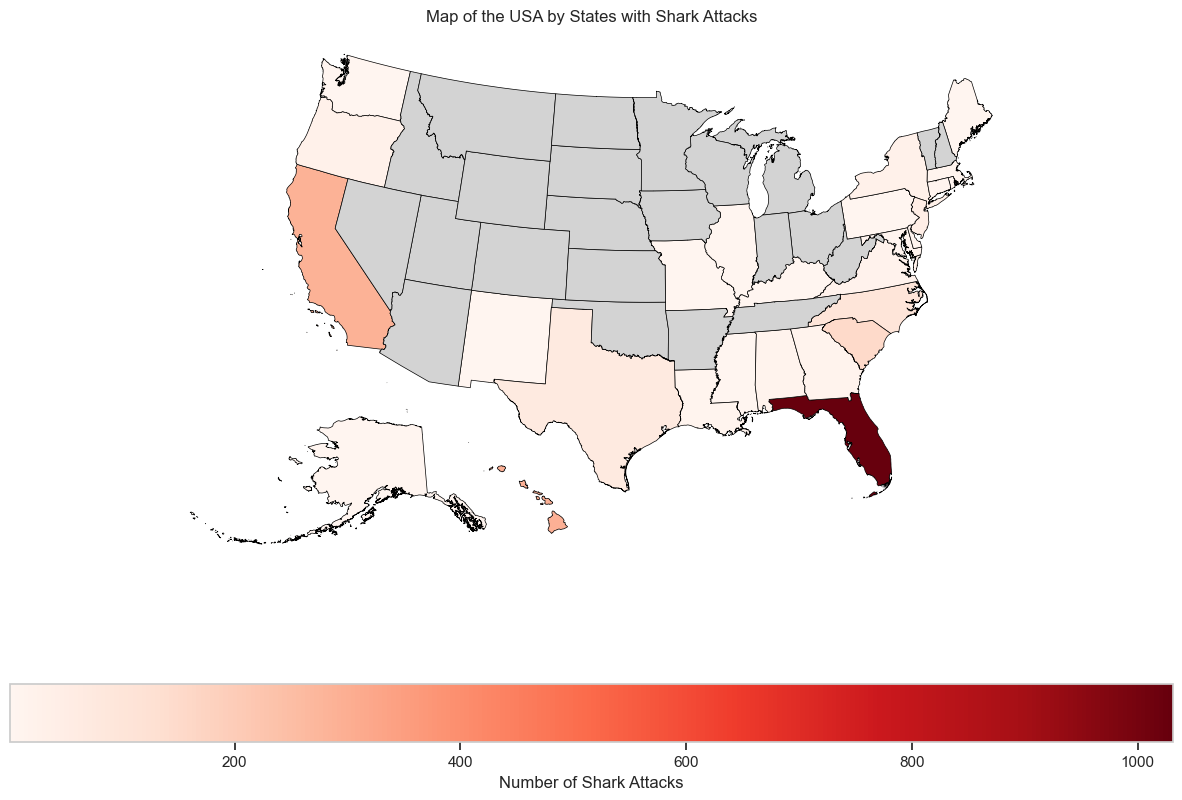

In [204]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
states.plot(column='count', ax=ax, legend=True, cmap='Reds', edgecolor='black', linewidth=0.5,
               legend_kwds={'label': "Number of Shark Attacks",
                            'orientation': "horizontal"},
               missing_kwds={'color': 'lightgrey'})  # Color for states with no data

# Remove grid and axes
ax.grid(False)  # Disable the grid
ax.set_axis_off()  # Optionally turn off the axis
plt.title('Map of the USA by States with Shark Attacks')
plt.show()

In [205]:
# let's try to do the same by counties in Florida, the state with the most attacks registered
dfclean[dfclean['area']=='Florida'].location.value_counts()

location
New Smyrna Beach, Volusia County                      163
Daytona Beach, Volusia County                          30
Ponce Inlet, Volusia County                            20
Melbourne Beach, Brevard County                        18
Cocoa Beach, Brevard County                            12
                                                     ... 
Sunglow Pier, Daytona Beach Shores, Volusia County      1
Shepard Park, Cocoa Beach, Brevard County               1
Melbourne Beach, Brevard County                         1
Coral Cove Park, Jupiter Inlet, Palm Beach County       1
Mosquito Inlet (Ponce Inlet), Volusia County            1
Name: count, Length: 505, dtype: int64

In [206]:
dfFlorida = dfclean[dfclean['area']=='Florida']
dfFlorida.location.isna().sum() # before cleaning with Regex we have to get rid of the nulls

12

In [207]:
dfFlorida.shape

(1031, 17)

In [208]:
# we have 12 nulls
dfFlorida.dropna(subset=['location'], inplace=True)
dfFlorida.shape

(1019, 17)

In [209]:
dfFlorida.location.value_counts()

location
New Smyrna Beach, Volusia County                      163
Daytona Beach, Volusia County                          30
Ponce Inlet, Volusia County                            20
Melbourne Beach, Brevard County                        18
Cocoa Beach, Brevard County                            12
                                                     ... 
Sunglow Pier, Daytona Beach Shores, Volusia County      1
Shepard Park, Cocoa Beach, Brevard County               1
Melbourne Beach, Brevard County                         1
Coral Cove Park, Jupiter Inlet, Palm Beach County       1
Mosquito Inlet (Ponce Inlet), Volusia County            1
Name: count, Length: 505, dtype: int64

In [210]:
# let's create another column called 'County'
dfFlorida['county'] = np.where(dfFlorida['location'].str.contains(r"Volusia"), 'Volusia', dfFlorida['location'])

In [211]:
dfFlorida.columns

Index(['date', 'year', 'type', 'country', 'info_country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'info_age', 'injury', 'fatal', 'time',
       'species', 'investigator or source', 'county'],
      dtype='object')

In [212]:
countiescolumns = ['date', 'year', 'country', 'area', 'location', 'county',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal', 
       'species' ] # while we are at it, let's erase the columns we're not gonna use
dfFlorida = dfFlorida.reindex (columns = countiescolumns)
dfFlorida.sample()

,date,year,country,area,location,county,activity,name,sex,age,injury,fatal,species
2239,1997.08.02.b,1997,Usa,Florida,"New Smyrna Beach, Volusia County",Volusia,Surfing,Rodigo Cesar,Male,17.0,Top of left foot bitten,No,juvenile shark


In [213]:
counties_of_Florida = dfFlorida.county.unique() # to get all the counties
counties_of_Florida_list = list(counties_of_Florida) # store them in a list
counties_of_Florida_list.sort() # sort the list alphabetically
counties_of_Florida_list # I see it better

[' Cocoa Beach, Brevard  County',
 ' Marathon, Monroe County',
 ' Palm Beach County',
 ' Riviera Beach, Palm Beach County',
 '"Stuart Rocks", Martin County',
 '1 mile off Miami Beach',
 '10 miles off Cape Canaveral',
 '100 miles off Ft. Myers Beach',
 '100 miles offshore',
 '11 miles off Dog Island in the Gulf of Mexico, Franklin County',
 '12 miles northeast of Mayport,  Duval County',
 '15 miles north of Sebastian Inlet, Brevard County',
 '150 miles from Crystal River',
 '150 miles southeast of Cape Kennedy',
 '16 miles north of Fort Pierce Inlet, Indian River County ',
 '2 miles east of Dania Beach, Broward County',
 '2 miles off Jupiter, Palm Beach County',
 '2 miles off Pompano Beach, Broward County',
 '20 miles from Mayport',
 '275 miles northeast of Miami',
 '3 miles east of Jacksonville Beach, Duval County',
 '3 miles north of the inlet at Palm Beach',
 '3 miles off Jupiter, Palm Beach County',
 '3 miles south of Sebastian Inlet State Park, Indian River County',
 '3 to 4 miles 

In [214]:
# let's start the Regex party, I use a map of the counties of Florida to go in order
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Volusia"), 'Volusia', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Nassau"), 'Nassau', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Duval"), 'Duval', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Johns"), 'St. Johns', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("John's County"), 'St. Johns', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Flagler"), 'Flagler', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Brevard"), 'Brevard', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Indian River"), 'Indian River', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Lucie County"), 'St. Lucie', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Martin"), 'Martin', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Palm Beach"), 'Palm Beach', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Broward"), 'Broward', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Miami"), 'Miami-Dade', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Dade"), 'Miami-Dade', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Monroe"), 'Monroe', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Collier"), 'Collier', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Lee"), 'Lee', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Charlotte"), 'Charlotte', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Sarasota"), 'Sarasota', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Manatee"), 'Manatee', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Hillsboro"), 'Hillsborough', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Pinellas"), 'Pinellas', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Hernando"), 'Hernando', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Citrus"), 'Citrus', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Wakulla"), 'Wakulla', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Franklin"), 'Franklin', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Gulf Coun"), 'Gulf', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Bay Coun"), 'Bay', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Walton Coun"), 'Walton', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Okaloosa"), 'Okaloosa', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Escambia"), 'Escambia', dfFlorida['county'])

In [215]:
dfFlorida.county.value_counts().head(40) # to see if I can change some more locations

county
Volusia                               310
Palm Beach                            113
Brevard                               106
Monroe                                 45
Duval                                  41
St. Lucie                              39
Martin                                 37
St. Johns                              35
Miami-Dade                             30
Indian River                           25
Broward                                20
Pinellas                               16
Lee                                    15
Escambia                               14
Sarasota                               13
Bay                                    11
Florida Keys                            8
Nassau                                  7
Flagler                                 6
Okaloosa                                6
Hillsborough                            6
Manatee                                 6
Collier                                 5
New Smyrna Beach           

In [216]:
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Florida Keys"), 'Monroe', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("New Smyrna Beach"), 'Volusia', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Fort Lauderdale"), 'Broward', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Elliot Key"), 'Miami-Dade', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Jupiter Inlet"), 'Palm Beach', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Key West"), 'Monroe', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Florida Straits"), 'Monroe', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Delray Beach"), 'Palm Beach', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("New Smyrna Beach"), 'Volusia', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Daytona Beach"), 'Volusia', dfFlorida['county'])
dfFlorida['county'] = np.where(dfFlorida['county'].str.contains("Gadsden"), 'Hillsborough', dfFlorida['county'])

# I'm tired, there are way too many distinct values, which are not gonna make a big difference
print(dfFlorida.county.nunique())
dfFlorida.county.value_counts().head(20)

93


county
Volusia         316
Palm Beach      118
Brevard         106
Monroe           62
Duval            41
St. Lucie        39
Martin           37
St. Johns        35
Miami-Dade       33
Indian River     25
Broward          23
Pinellas         16
Lee              15
Escambia         14
Sarasota         13
Bay              11
Hillsborough      8
Nassau            7
Manatee           6
Flagler           6
Name: count, dtype: int64

In [217]:
counties = gpd.read_file("cb_2018_us_county_500k/")
states[states['NAME']=='Florida'] # I check which FIPS code is Florida

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,count
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((1599929.568 -1197648.525, 1600...",1031.0


In [218]:
counties.sample()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
740,13,219,00356774,0500000US13219,13219,Oconee,06,477412565,5295410,"POLYGON ((-83.64703 33.9062, -83.64434 33.9076..."


In [219]:
# Filter to only Florida counties using the state FIPS code
florida_counties = counties[counties['STATEFP'] == '12'] #STATEFP is the common column I have to use

In [220]:
usa_florida = dfFlorida[dfFlorida['country'] == 'Usa']
# usa_data['state'] = usa_data['area'].str.title()
county_counts = usa_florida.county.value_counts().reset_index()
county_counts.columns = ['NAME', 'count'] # we change the name of the column so it is called 'NAME' in both df we have to merge
florida_counties = florida_counties.merge(county_counts, on='NAME', how='left') # Merge with GeoDataFrame

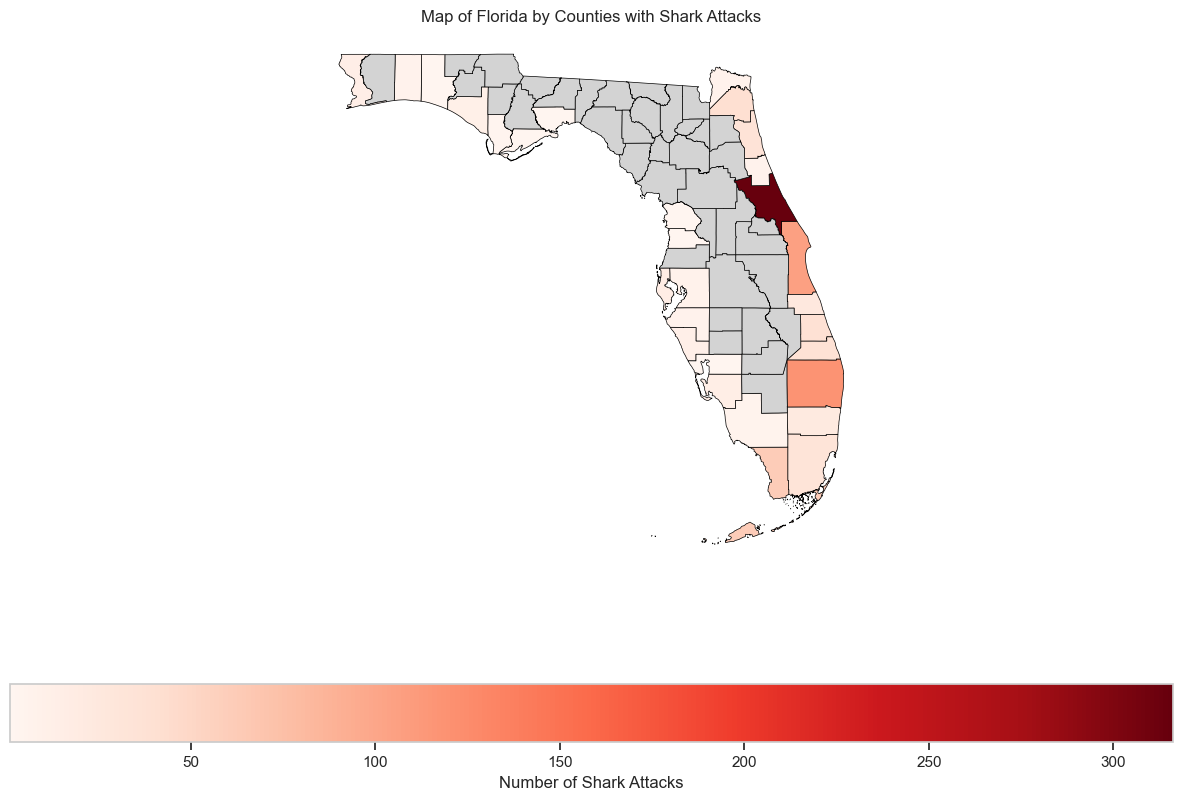

In [221]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
florida_counties.plot(column='count', ax=ax, legend=True, cmap='Reds', edgecolor='black', linewidth=0.5,
               legend_kwds={'label': "Number of Shark Attacks",
                            'orientation': "horizontal"},
               missing_kwds={'color': 'lightgrey'})  # Color for states with no data

# Remove grid and axes
ax.grid(False)  # Disable the grid
ax.set_axis_off()  # Optionally turn off the axis
plt.title('Map of Florida by Counties with Shark Attacks')
plt.show()